# Lending Club Default Case Study
#### This exercise is to understand the driving factors (or driver variables) behind loan default


## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Analysis Process

1. Data Understanding
2. Data Cleaning
3. Data Analysis
4. Analysis Report


### Import All the Required Libraries

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

#### Read the Given csv file and understand the data eg. Column names , Column types , Any Columns with Null values, Any rows having empty values

## Data Understanding

In [192]:
#reading the data
loan_data = pd.read_csv("loan.csv")
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [193]:
# Check the Data in the file
print('Column Names : ')
print(loan_data.columns)
print('Shape of loan_data : ')
print(loan_data.shape)
print('Initial Few Data :')
loan_data.head()

Column Names : 
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
Shape of loan_data : 
(39717, 111)
Initial Few Data :


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [194]:
# looks like there are columns with no values/ NAN
# check the details of columns having no values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [195]:
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### It's observed that there are columns having No data [Columns having 100% missing Data]

## Data Cleaning

In [196]:
#Filter all the columns having missing value % more than 90%
missing_value_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
missing_value_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [197]:
#Drop the missing_value_columns
loan_data = loan_data.drop(missing_value_columns, axis=1)

In [198]:
loan_data.shape

(39717, 55)

In [199]:
#List the columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [200]:
#Check the missing values details again which are < 90%
100*(loan_data.isnull().sum()/len(loan_data.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


There are few columns with missing values.
    1. emp_title                        : 6.191303
    2. emp_length                       : 2.706650
    3. desc                             : 32.585543
    4. title                            : 0.027696
    5. mths_since_last_delinq           : 64.662487
    6. revol_util                       : 0.125891
    7. last_pymnt_d                     : 0.178765
    8. last_credit_pull_d               : 0.005036
    9. collections_12_mths_ex_med       : 0.140998
    10. chargeoff_within_12_mths        : 0.140998
    11. pub_rec_bankruptcies            : 1.754916
    12. tax_liens                       : 0.098195
    
Here mths_since_last_delinq and desc has higher rate of missing values.

In [201]:
#check the data for mths_since_last_delinq and desc
loan_data[['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


As per the Data Dictionary desc means Loan description provided by the borrower, which looks basically the comments whic can be ignored for our case study
Similarly mths_since_last_delinq means The number of months since the borrower's last delinquency i.e the months passed since the borrower has missed the payment. Also majority data are missing. This also can be dropped as well
We will ignore other columns having missing value percentage < 5%

In [202]:
loan_data = loan_data.drop(['desc','mths_since_last_delinq'], axis=1)
loan_data.shape

(39717, 53)

In [203]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [204]:
#check for rows having missing column values
loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [205]:
max(loan_data.isnull().sum(axis=1))

5

There is no major missing values in the rows. Hence no need to drop any rows.
Let's proceed with analyzing data

## Data Analysis

In [206]:
#Check for Datatypes for columns

In [207]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [208]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [209]:
loan_data[['term','int_rate','revol_util']].head()

,term,int_rate,revol_util
0,36 months,10.65%,83.70%
1,60 months,15.27%,9.40%
2,36 months,15.96%,98.50%
3,36 months,13.49%,21%
4,60 months,12.69%,53.90%


In [210]:
# make term and int_rate to float type
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_data['term'] = loan_data['term'].apply(lambda x: pd.to_numeric(x.replace(" months","")))

In [211]:
loan_data.revol_util.fillna(value='0%', inplace=True)
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [212]:
loan_data[['term','int_rate','revol_util']].head()

,term,int_rate,revol_util
0,36,10.65,83.7
1,60,15.27,9.4
2,36,15.96,98.5
3,36,13.49,21.0
4,60,12.69,53.9


In [213]:
#check the column info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  int64  
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [214]:
# As per Data Dictionary emp_length is the tenure of the employement. This also can be converted to float type
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [215]:
loan_data['emp_length'].isnull().sum()

1075

In [216]:
#let's drop the rows having emp_length as NAN
loan_data.dropna(subset=['emp_length'], inplace=True)

In [217]:
#convert the emp_length to numeric
import re
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))

In [218]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

In [219]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We need to filter the columns which are required for our analysis


In [220]:
loan_data[['title','purpose','emp_title','url','zip_code','addr_state']]

,title,purpose,emp_title,url,zip_code,addr_state
0,Computer,credit_card,NaN,https://lendingclub.com/browse/loanDetail.acti...,860xx,AZ
1,bike,car,Ryder,https://lendingclub.com/browse/loanDetail.acti...,309xx,GA
2,real estate business,small_business,NaN,https://lendingclub.com/browse/loanDetail.acti...,606xx,IL
3,personel,other,AIR RESOURCES BOARD,https://lendingclub.com/browse/loanDetail.acti...,917xx,CA
4,Personal,other,University Medical Group,https://lendingclub.com/browse/loanDetail.acti...,972xx,OR
...,...,...,...,...,...,...
39712,Home Improvement,home_improvement,FiSite Research,https://lendingclub.com/browse/loanDetail.acti...,802xx,CO
39713,Retiring credit card debt,credit_card,"Squarewave Solutions, Ltd.",https://lendingclub.com/browse/loanDetail.acti...,274xx,NC
39714,MBA Loan Consolidation,debt_consolidation,NaN,https://lendingclub.com/browse/loanDetail.acti...,017xx,MA
39715,JAL Loan,other,NaN,https://lendingclub.com/browse/loanDetail.acti...,208xx,MD


In [221]:
#'title','emp_title','url','zip_code','addr_state' columns are not required
# title Description for cause of loan which is linked to purpose which categories the loan
# emp_title Job Title of the borrower, It is not required for our analysis
# url loan action page 
# zip_code , addr_state - addresses which is not relevant for our analysis
columns_to_drop = ['title','emp_title','url','zip_code','addr_state']
loan_data = loan_data.drop(columns_to_drop, axis=1)

In [222]:
loan_data.shape

(38642, 48)

In [223]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_length                  38642 non-null  int64  
 11  home_ownership              38642 non-null  object 
 12  annual_inc                  38642 non-null  float64
 13  verification_status         38642 no

Below are the list of Columns having only single values. These will not contribute to our analysis
1. tax_liens
2. pymnt_plan
3. initial_list_status 
4. application_type 
5. delinq_amnt 
6. acc_now_delinq  
8. chargeoff_within_12_mths 
9. policy_code 
10. collections_12_mths_ex_med
11. next_pymnt_d


In [224]:
#Drop the columns having single values
columns_to_drop = ['tax_liens' , 'pymnt_plan' , 'initial_list_status' , 'application_type' , 'delinq_amnt' , 'acc_now_delinq' , 'chargeoff_within_12_mths' , 'policy_code' , 'collections_12_mths_ex_med']
loan_data = loan_data.drop(columns_to_drop, axis=1)
loan_data.shape

(38642, 39)

"funded_amnt" is not needed because we only need info as to how much is funded in actual. 
As we have "funded_amnt_inv" , we can remove the earlier column.


In [225]:
loan_data = loan_data.drop(['funded_amnt'], axis=1)
loan_data.shape

(38642, 38)

In [226]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38642 non-null  int64  
 1   member_id                38642 non-null  int64  
 2   loan_amnt                38642 non-null  int64  
 3   funded_amnt_inv          38642 non-null  float64
 4   term                     38642 non-null  int64  
 5   int_rate                 38642 non-null  float64
 6   installment              38642 non-null  float64
 7   grade                    38642 non-null  object 
 8   sub_grade                38642 non-null  object 
 9   emp_length               38642 non-null  int64  
 10  home_ownership           38642 non-null  object 
 11  annual_inc               38642 non-null  float64
 12  verification_status      38642 non-null  object 
 13  issue_d                  38642 non-null  object 
 14  loan_status              38

Below are few columns those are Post-Loan-Approval relevant records
These will not help in predicting the Defaulters
Hence these can be also removed

1. delinq_2yrs
2. revol_bal
3. out_prncp
4. total_pymnt
5. total_rec_prncp
6. total_rec_int
7. total_rec_late_fee
8. recoveries
9. collection_recovery_fee
10. last_pymnt_d
11. last_pymnt_amnt
12. next_pymnt_d
13. chargeoff_within_12_mths
14. mths_since_last_delinq
15. mths_since_last_record


In [227]:
#Drop the columns not relevant for our analysis
columns_to_drop = ['delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan_data = loan_data.drop(columns_to_drop, axis=1)
loan_data.shape

(38642, 27)

In [228]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt_inv       38642 non-null  float64
 4   term                  38642 non-null  int64  
 5   int_rate              38642 non-null  float64
 6   installment           38642 non-null  float64
 7   grade                 38642 non-null  object 
 8   sub_grade             38642 non-null  object 
 9   emp_length            38642 non-null  int64  
 10  home_ownership        38642 non-null  object 
 11  annual_inc            38642 non-null  float64
 12  verification_status   38642 non-null  object 
 13  issue_d               38642 non-null  object 
 14  loan_status           38642 non-null  object 
 15  purpose               38

Check Loan Status

In [229]:
loan_data['loan_status'] = loan_data['loan_status'].astype('category')
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

Loan Status Current in the ongoing loan. Can be filtered as we need analyize data based in Fully paide and Charged off


In [230]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))
loan_data['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

In [231]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'out_prncp_inv',
       'total_pymnt_inv', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

## Loan Amount Distribution plot

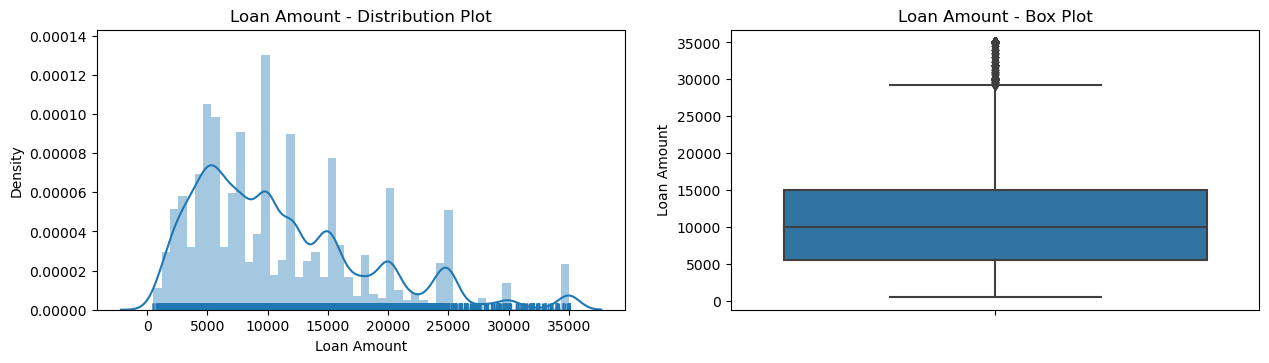

In [232]:
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot')
ax.set_ylabel('Loan Amount')
plt.show()

## Univariate Analysis : Visualizing Categorical Data
##### loan_status, grade, sub-grade , home_ownership , term , verification_status , purpose

In [233]:
loan_data['loan_status'].describe()

count    37544.000000
mean         0.143805
std          0.350896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [234]:
round(np.mean(loan_data['loan_status']),2)

0.14

#### The overall default rate is about 14%.

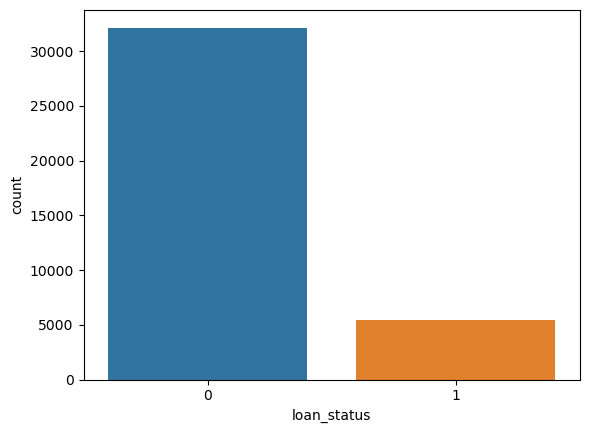

In [235]:
sns.countplot(x='loan_status', data=loan_data)
plt.show()

### Loan status categorization
#### Fully Paid = 0
#### Charged off = 1

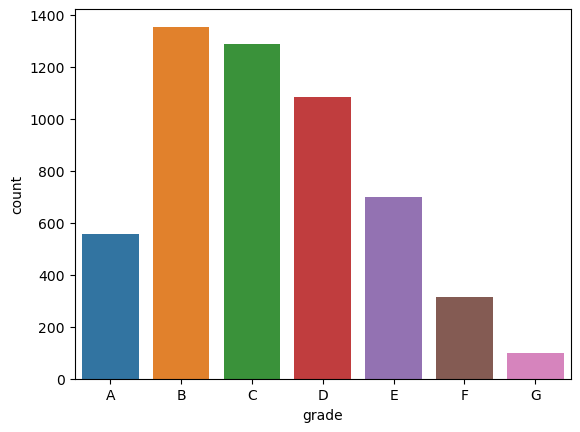

In [236]:
sns.countplot(x='grade', data=loan_data[loan_data['loan_status'] == 1], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [237]:
#new Column Added to get Subgrade values
loan_data['sub_grade_val'] =loan_data.sub_grade.apply(lambda x : x[-1])
loan_data.sub_grade_val.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade_val, dtype: object

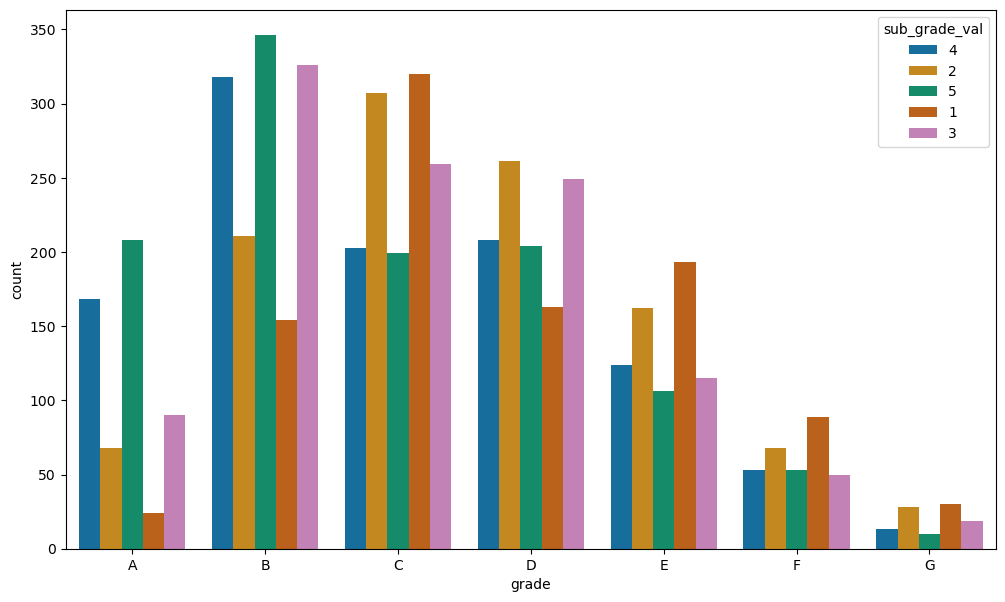

In [238]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_val',data=loan_data[loan_data['loan_status'] == 1])
plt.show()

#### Observations : Loan Borrower with Grade - B has more Dafault Rate

### Defining a common functions can be used to plot the visualization

In [239]:
## Defining as function to get Labels
def getLabel(cat):
    if cat == "int_rate_groups":
        return "Interest Rate"
    elif cat == "open_acc_groups":
        return "Open Credit Accounts."
    elif cat == "revol_util_groups":
        return "Revol Line Utilization"
    elif cat == "total_acc_groups":
        return "Total Accounts"
    elif cat == "annual_inc_groups":
        return "Annual Salary"
    else:
        return cat

In [240]:
## Defining a function to plot bar
def plot_category_bar(cat, label, figx, figy):
    fig, ax = plt.subplots(figsize = (figx,figy))
    ax.set_yscale('log')
    sns.countplot(x=cat, data=loan_data[loan_data['loan_status'] == 1])
    plt.xlabel(label)     

### Analyze Home Ownership for Loan Status = Charged Off

In [241]:
# checking unique value for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [242]:
#replacing 'NONE' with 'OTHERS' as there are only 3 records with NONE
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

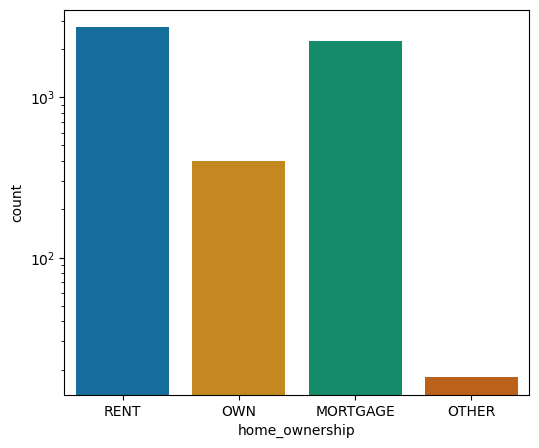

In [243]:
plot_category_bar('home_ownership', getLabel('home_ownership'), 6, 5)

#### Observations :Most of them living in rented home or mortgazed their home.Applicant numbers are high from these categories so charged off is high too.

### Analyzing Purpose for Loan Status = Charged Off

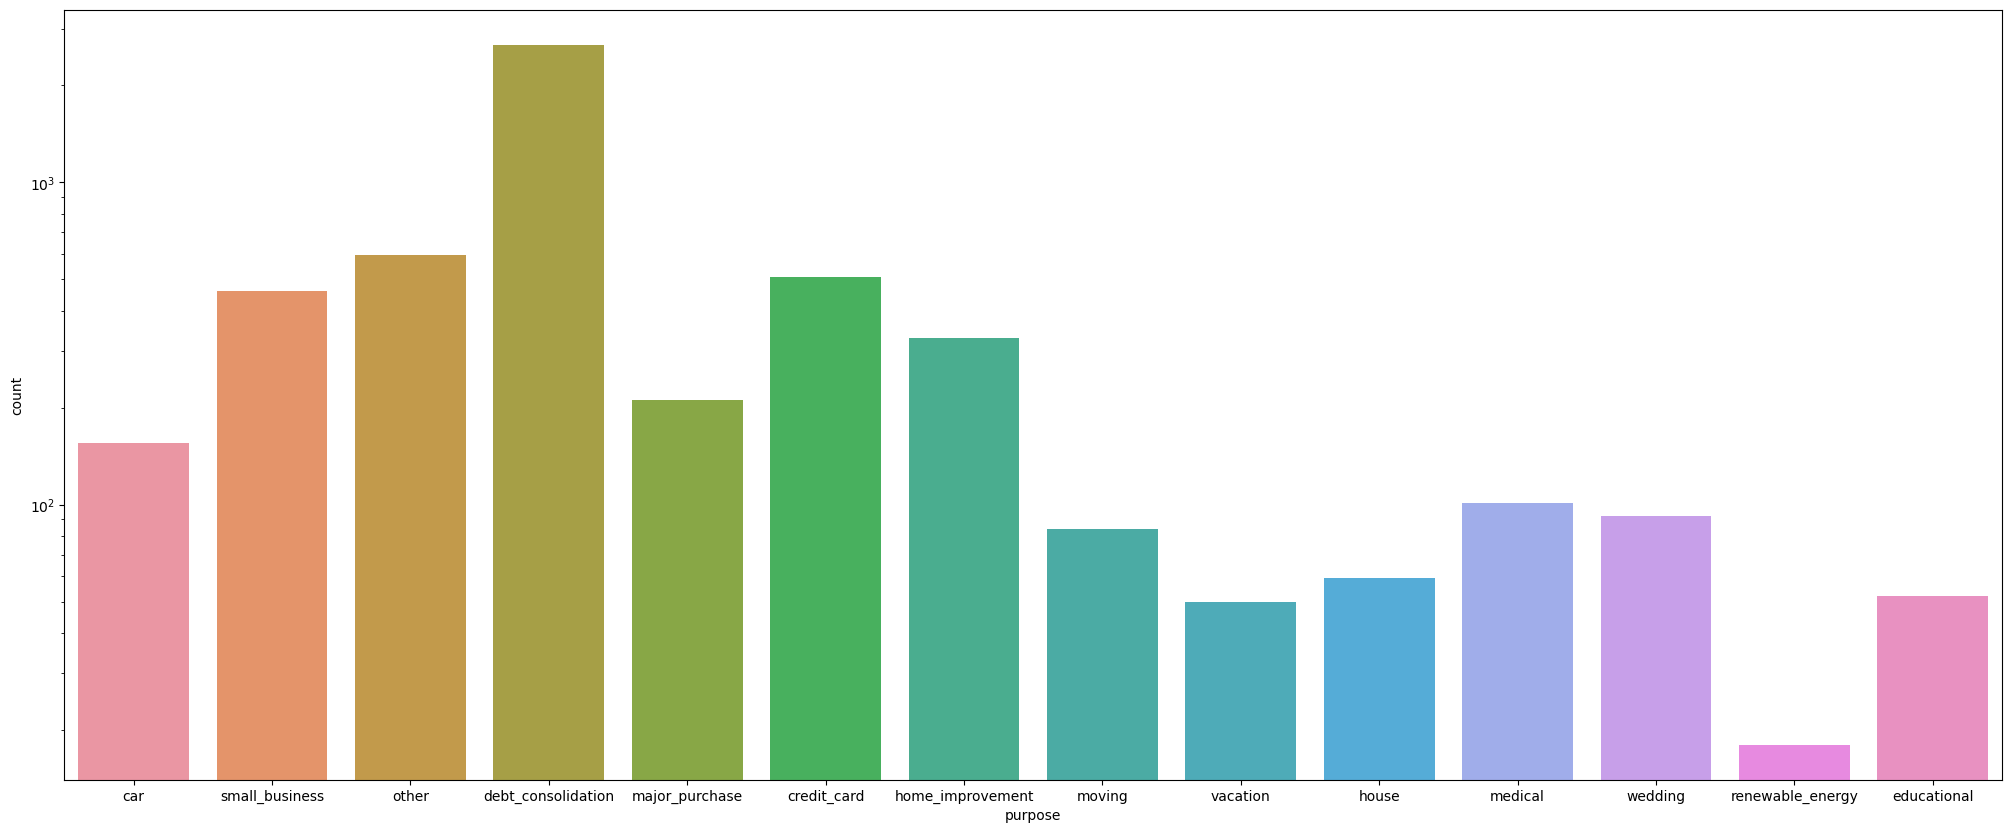

In [244]:
plot_category_bar('purpose', getLabel('purpose'), 25, 10)

#### Observations : Most of the loans were taken for the purpose of debt consolidation & paying credit card bill. Number of chraged off count also high too for these loans.

### Analyzing Tern for Loan Status = Charged Off

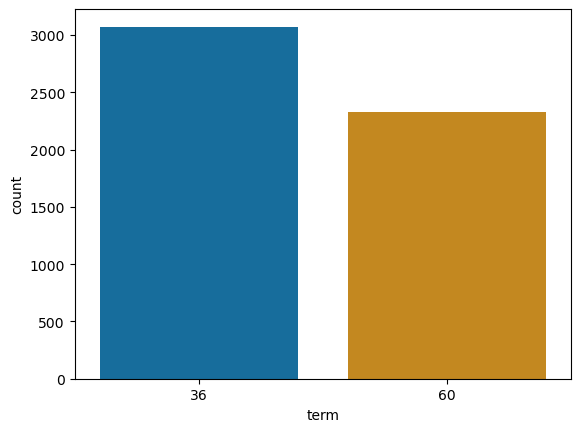

In [245]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']== 1])
plt.show()

#### Observation : The applicants with term as 36 month are more likely to be defaulters than 60 months applicants

### Analyzing Verification Status for Loan Status = Charged Off

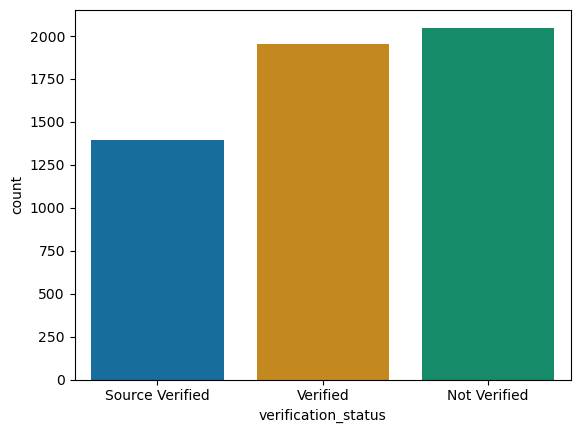

In [246]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status'] == 1])
plt.show()

#### Observation : Applicant who are not verified are more likely to be defaulters

### Analyzing Employee year of experience for Loan Status = Charged Off

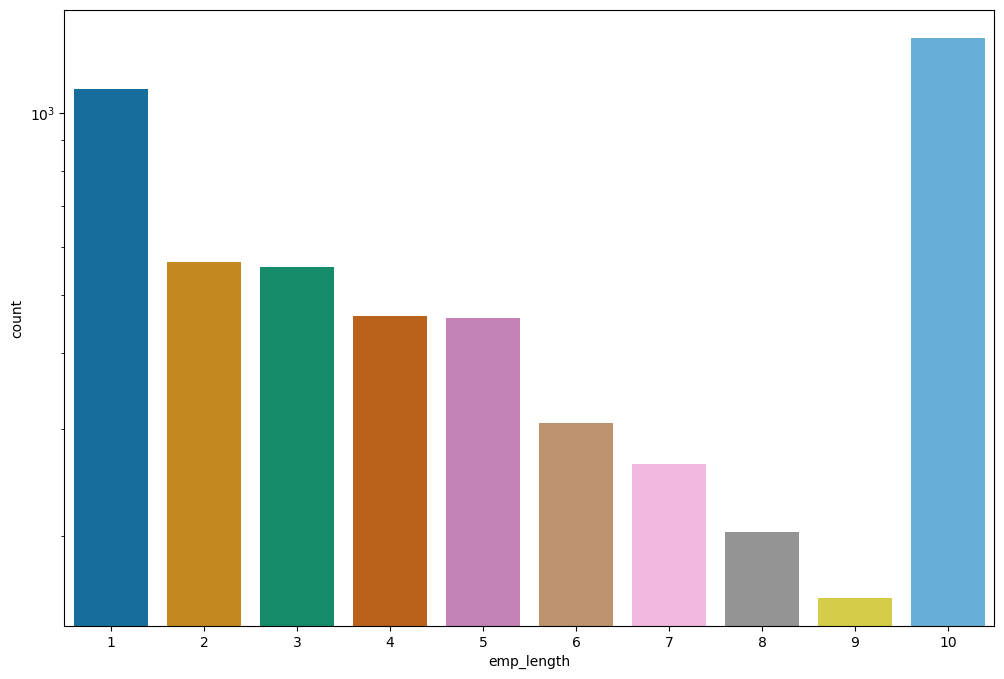

In [247]:
plot_category_bar('emp_length', getLabel('emp_length'), 12, 8)

#### Observation : Employee having more year of experience greater than 10 years are more like to default loan

## Univariate Analysis : Converting Continuos Numerical Data to Categorical Data and Visualize

### Creating Bins for Continuos Numerical Data 

In [248]:
#creating bins for int_rate,open_acc,revol_util,total_acc,annual_inc
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-12', '12.5-16', '16 +'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])


In [249]:
# Viewing new bins created
loan_data.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp_inv,total_pymnt_inv,last_credit_pull_d,pub_rec_bankruptcies,sub_grade_val,annual_inc_groups,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups
0,1077501,1296599,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.0,5833.84,May-16,0.0,2,20000-40000,10-12,2-10,80-100,2-20
1,1077430,1314167,2500,2500.0,60,15.27,59.83,C,C4,1,...,0.0,1008.71,Sep-13,0.0,4,20000-40000,12.5-16,2-10,0-20,2-20
2,1077175,1313524,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.0,3005.67,May-16,0.0,5,0-20000,12.5-16,2-10,80-100,2-20
3,1076863,1277178,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.0,12231.89,Apr-16,0.0,1,40000-60000,12.5-16,2-10,20-40,20-37
5,1075269,1311441,5000,5000.0,36,7.90,156.46,A,A4,3,...,0.0,5632.21,Jan-16,0.0,4,20000-40000,0-10,2-10,20-40,2-20


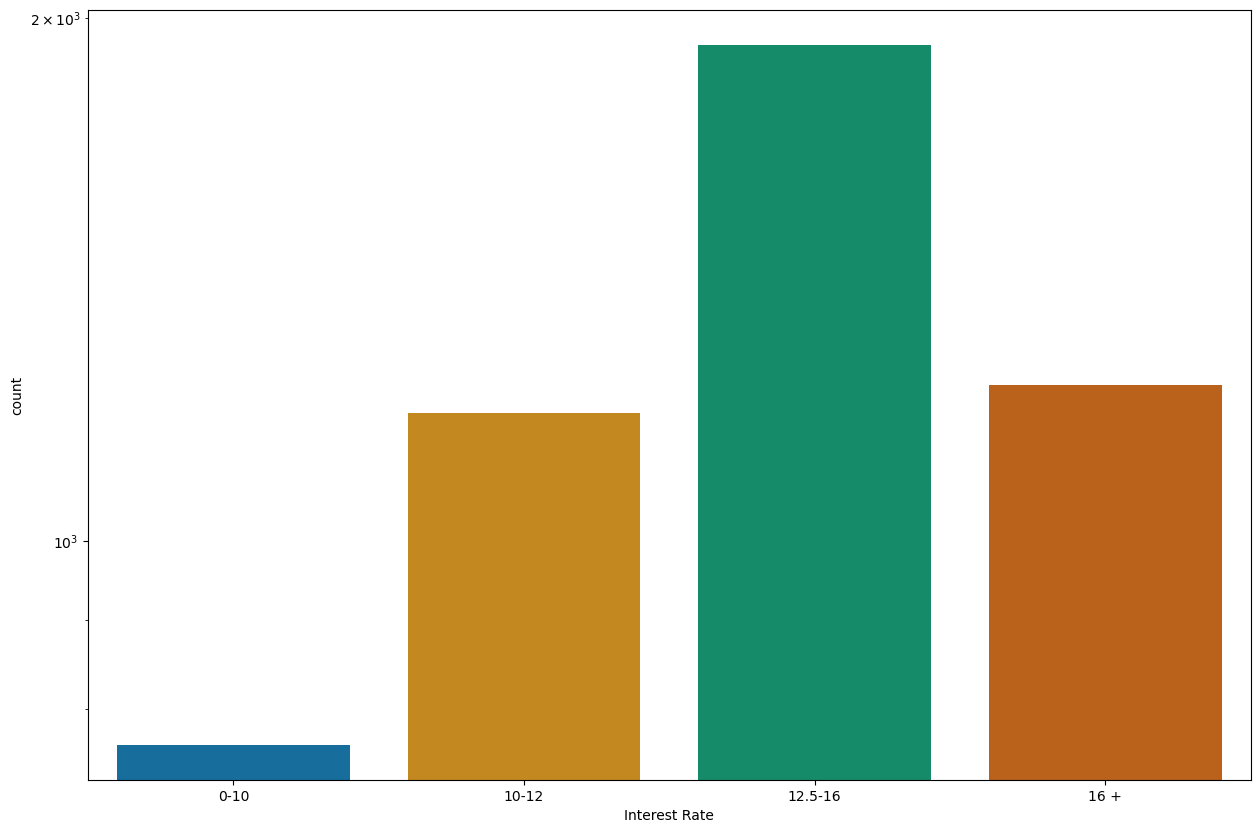

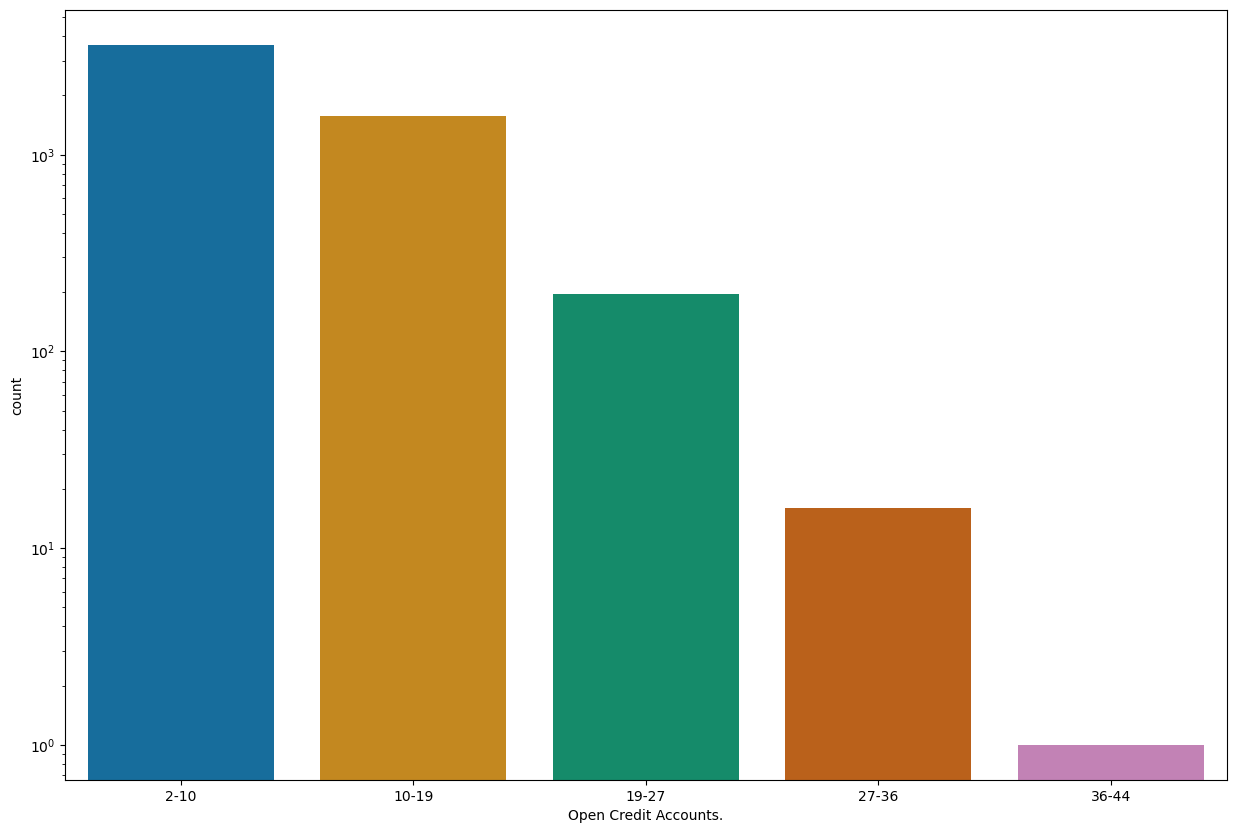

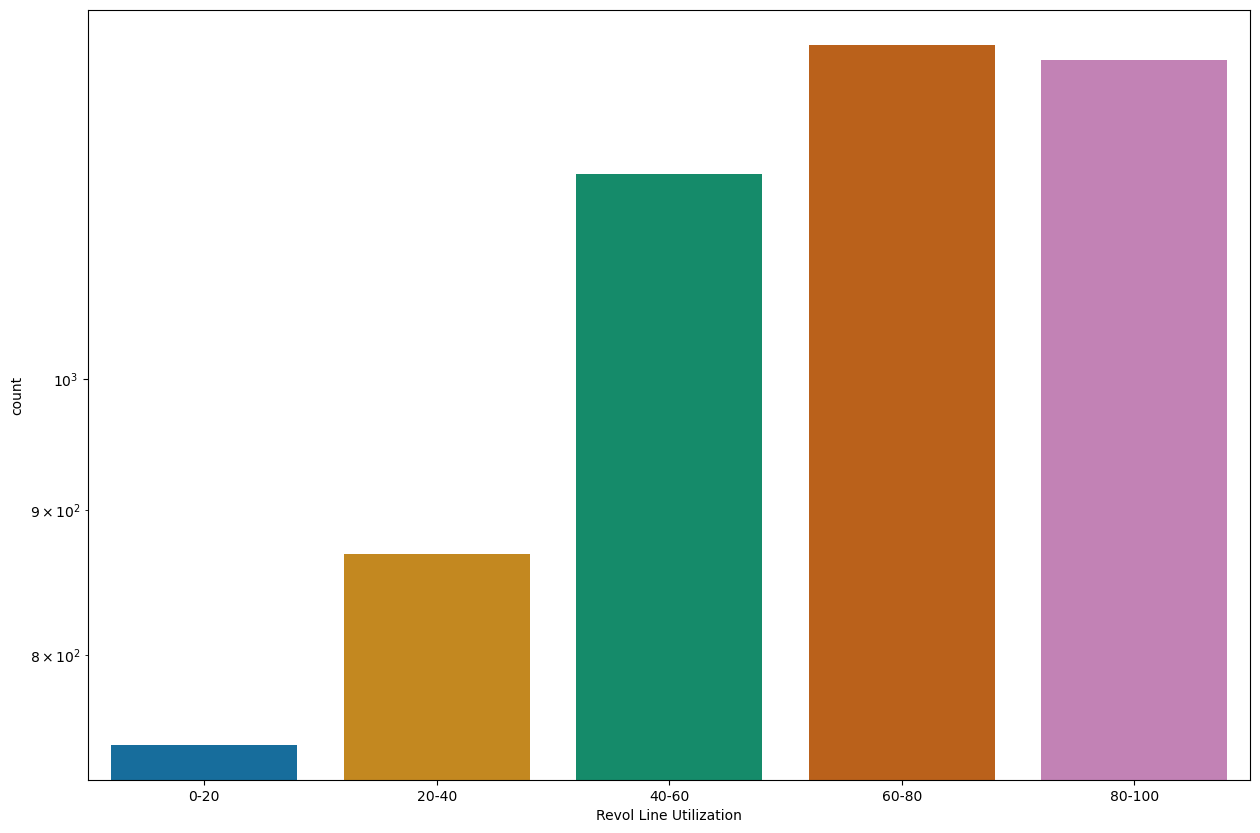

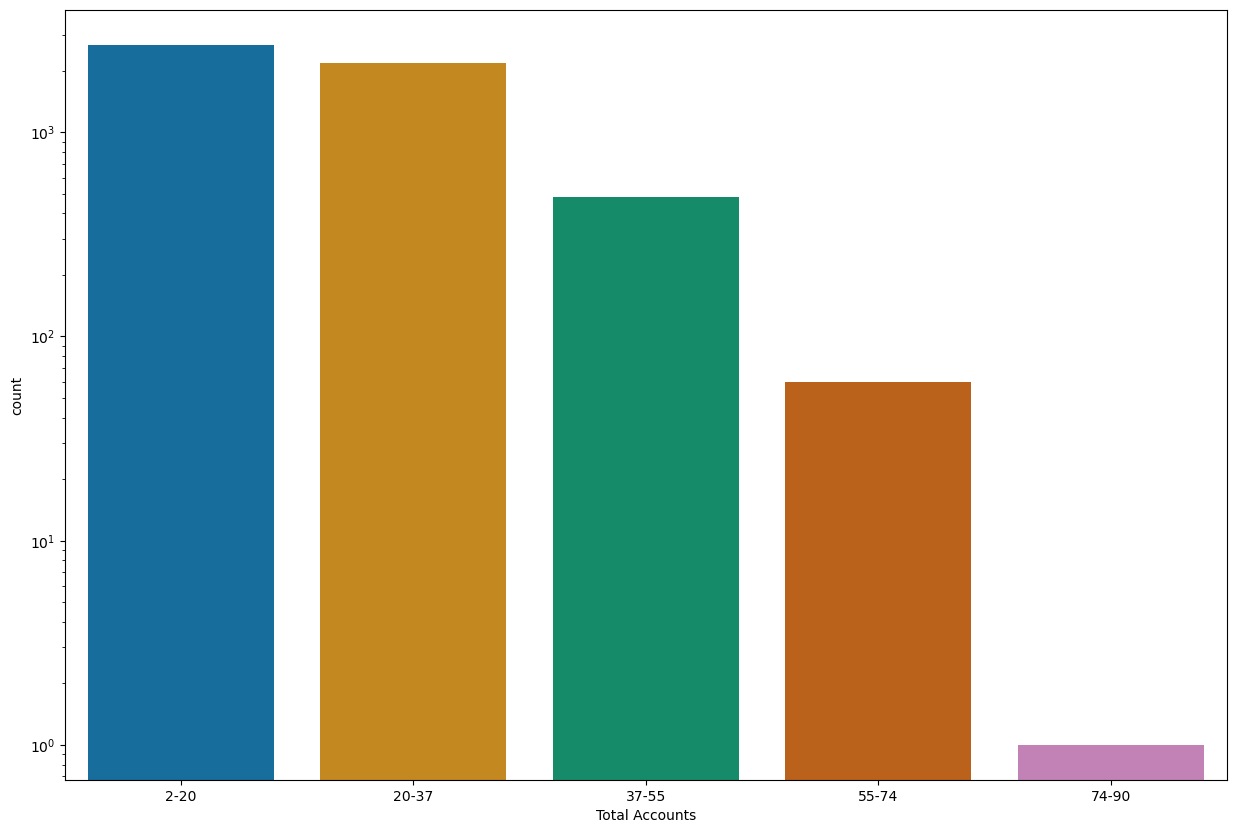

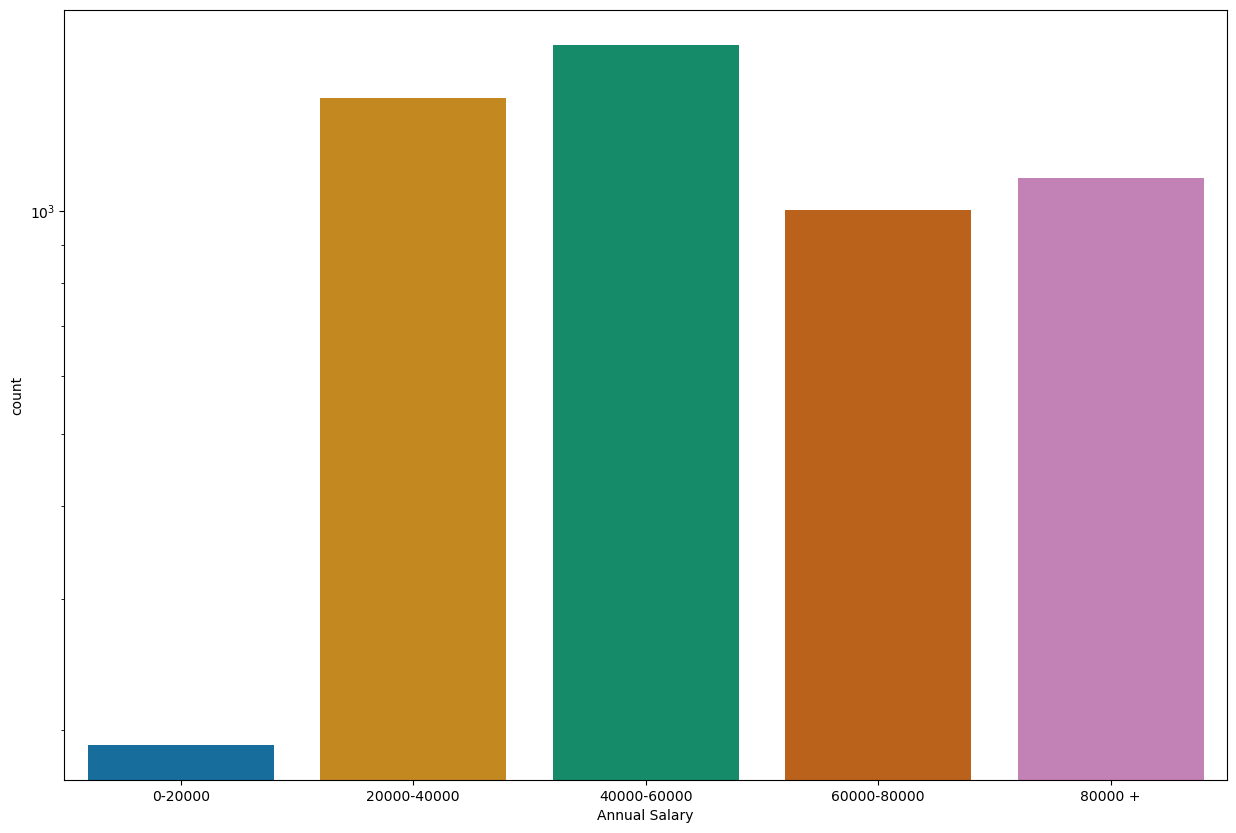

In [250]:
cols_to_plot = ['int_rate_groups','open_acc_groups','revol_util_groups','total_acc_groups','annual_inc_groups']
for cat in cols_to_plot:
    plot_category_bar(cat, getLabel(cat), 15, 10)

#### Observation :
- Applicants who receive interest at the rate of 12.5-16% are more likely to be defaulters
- Applicants who have 2-10 Open Credit accounts are more likely to be defaulters
- Applicant having revol_util in range of 60 -80 are more likely to be defaulters
- Applicants with total account in range of 2-20 are more likely to be defaulters
- Applicants with annual income in range of 40k to 60k are more likely to be defaulters

### Analyzing inquire in last 6 months

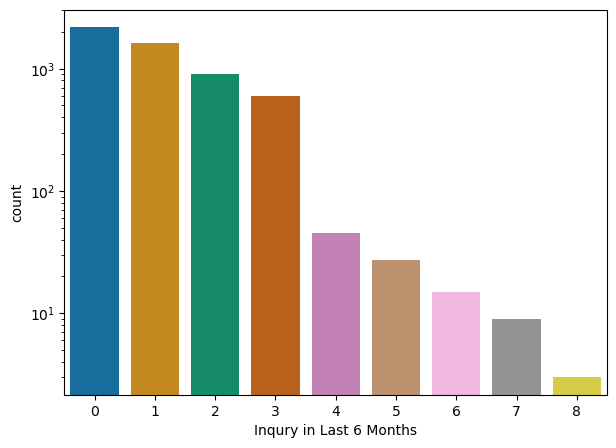

In [251]:
plot_category_bar('inq_last_6mths', 'Inqury in Last 6 Months', 7, 5)

#### Observation : Applicants are more likely to be defaulters When the no of enquiries in last 6 months is 0

### Analyzing pub rec

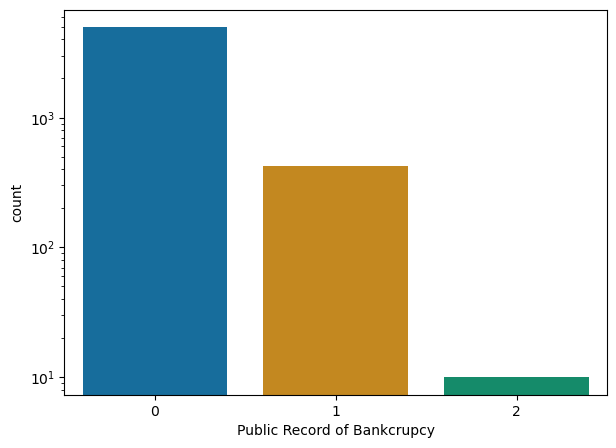

In [252]:
plot_category_bar('pub_rec', 'Public Record of Bankcrupcy', 7, 5)

#### Observation Applicants having number of derogatory public records is 0 are more likely to be defaulters

### Analyzing by issued month and year

In [253]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,out_prncp_inv,total_pymnt_inv,last_credit_pull_d,pub_rec_bankruptcies,sub_grade_val,annual_inc_groups,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups
0,1077501,1296599,5000,4975.0,36,10.65,162.87,B,B2,10,...,0.0,5833.84,May-16,0.0,2,20000-40000,10-12,2-10,80-100,2-20
1,1077430,1314167,2500,2500.0,60,15.27,59.83,C,C4,1,...,0.0,1008.71,Sep-13,0.0,4,20000-40000,12.5-16,2-10,0-20,2-20
2,1077175,1313524,2400,2400.0,36,15.96,84.33,C,C5,10,...,0.0,3005.67,May-16,0.0,5,0-20000,12.5-16,2-10,80-100,2-20
3,1076863,1277178,10000,10000.0,36,13.49,339.31,C,C1,10,...,0.0,12231.89,Apr-16,0.0,1,40000-60000,12.5-16,2-10,20-40,20-37
5,1075269,1311441,5000,5000.0,36,7.90,156.46,A,A4,3,...,0.0,5632.21,Jan-16,0.0,4,20000-40000,0-10,2-10,20-40,2-20


In [254]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)
loan_data['issue_month']=df_month_year[0]
loan_data['issue_year']='20' + df_month_year[2]

In [255]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,pub_rec_bankruptcies,sub_grade_val,annual_inc_groups,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,issue_month,issue_year
0,1077501,1296599,5000,4975.0,36,10.65,162.87,B,B2,10,...,May-16,0.0,2,20000-40000,10-12,2-10,80-100,2-20,Dec,2011
1,1077430,1314167,2500,2500.0,60,15.27,59.83,C,C4,1,...,Sep-13,0.0,4,20000-40000,12.5-16,2-10,0-20,2-20,Dec,2011
2,1077175,1313524,2400,2400.0,36,15.96,84.33,C,C5,10,...,May-16,0.0,5,0-20000,12.5-16,2-10,80-100,2-20,Dec,2011
3,1076863,1277178,10000,10000.0,36,13.49,339.31,C,C1,10,...,Apr-16,0.0,1,40000-60000,12.5-16,2-10,20-40,20-37,Dec,2011
5,1075269,1311441,5000,5000.0,36,7.90,156.46,A,A4,3,...,Jan-16,0.0,4,20000-40000,0-10,2-10,20-40,2-20,Dec,2011


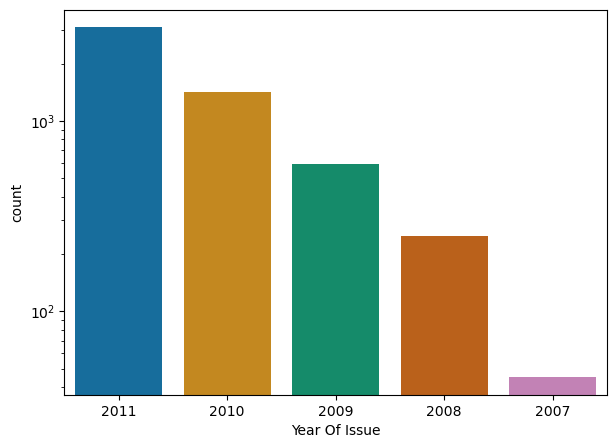

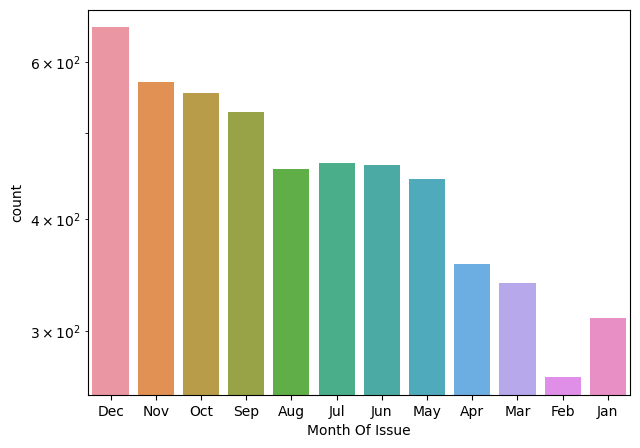

In [256]:
plot_category_bar('issue_year', 'Year Of Issue', 7, 5)
plot_category_bar('issue_month', 'Month Of Issue', 7, 5)

#### Observation : Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Creating bins for analyzing installment, dti, loan_amnt

In [257]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5000','5001-10000','10001-15000','15001-20000','20001-25000','25001-30000','30001-35000'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25000 +'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

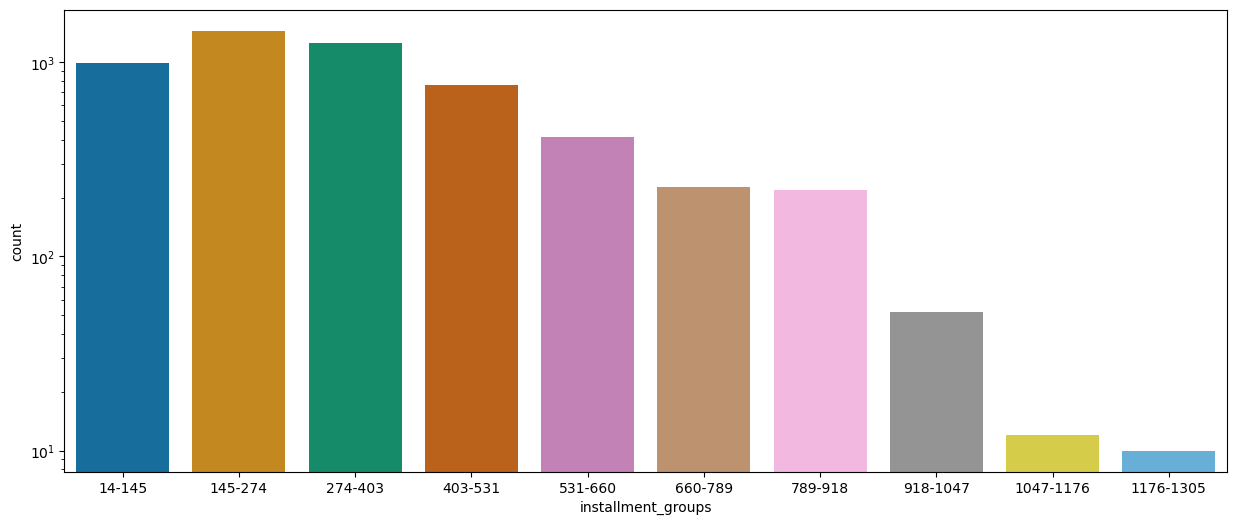

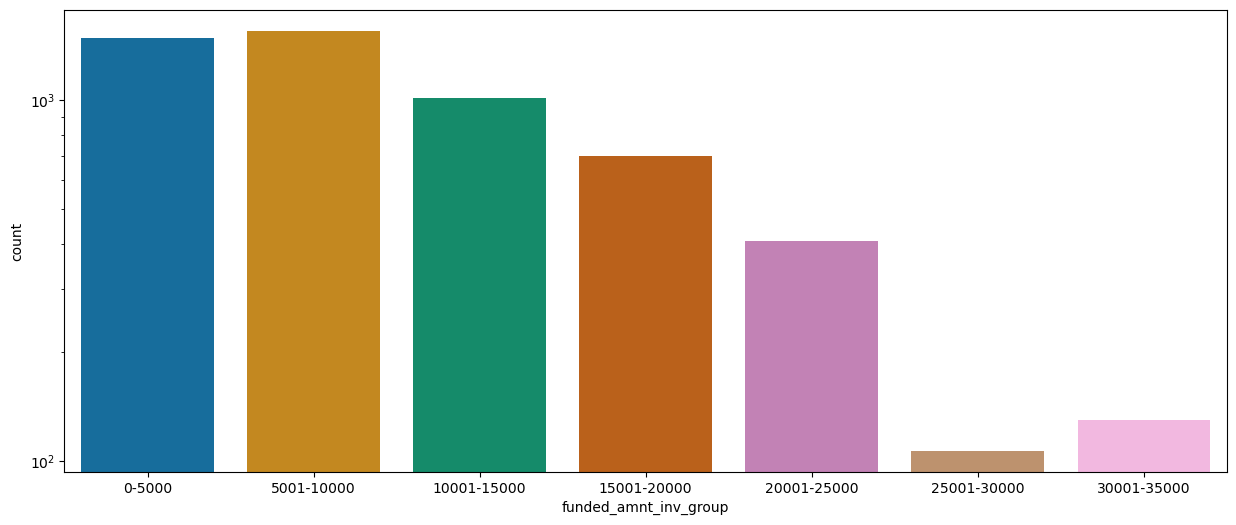

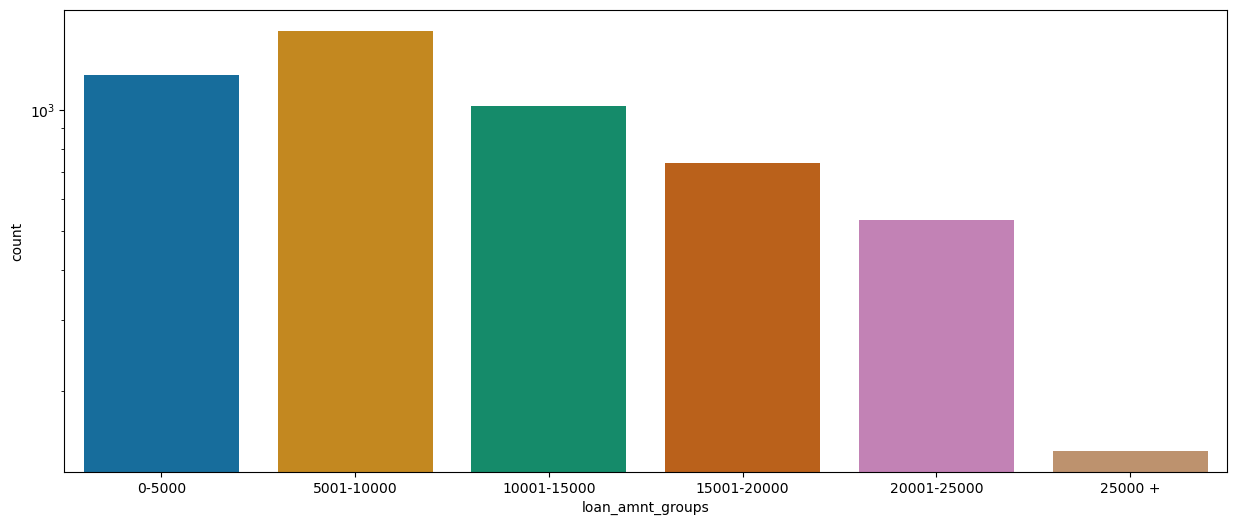

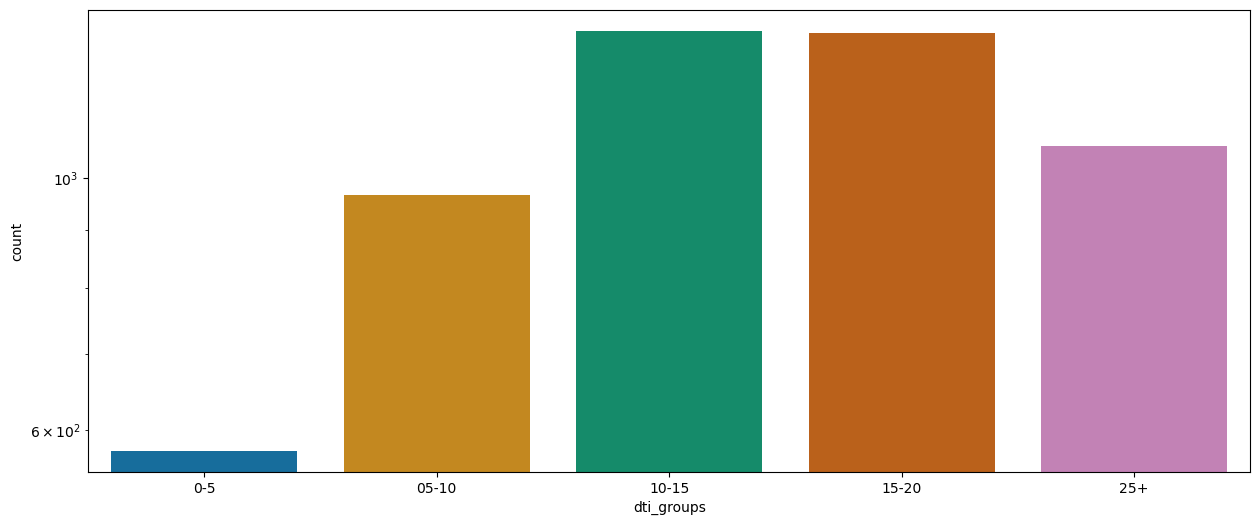

In [258]:
cols_to_plot = ['installment_groups','funded_amnt_inv_group','loan_amnt_groups','dti_groups']
for cat in cols_to_plot:
    plot_category_bar(cat, getLabel(cat), 15, 6)

#### Obeservations :
- When monthly installments are between 145-274 applicants are more likely to be defaulters
- When funded amount by investor is between 5000-10000, then 0-5000 applicants are more likely to be defaulters
- Loan amount is between 5000 - 10000 applicants are more likely to be defaulters
- DTI is between 10-15 and 15-20 applicants are more likely to be defaulters

### Observation on Univariate Analysis
#### Driving factor for Loan Defaulters 
1. Grade - B 
2. House Ownership - RENT and Mortgage has higher rate of being defaulter
3. Loans taken for the purpose of debt consolidation & paying credit card bill. 
4. The applicants with term as 36 month are more likely to be defaulters than 60 months applicants
5. Applicant who are not verified are more likely to be defaulters
6. Employee having more year of experience greater than 10 years are more like to default loan
7. Applicants who receive interest at the rate of 13-17% are more likely to be defaulters
8. Applicants who have 2-10 Open Credit accounts are more likely to be defaulters
9. Applicant having revol_util in range of 60 -80 are more likely to be defaulters
10. Applicants with total account in range of 2-20 are more likely to be defaulters
11. Applicants with annual income in range of 2k to 31k are more likely to be defaulters
12. Applicants are more likely to be defaulters When the no of enquiries in last 6 months is 0
13. Applicants having number of derogatory public records is 0 are more likely to be defaulters
14. When monthly installments are between 145-274 applicants are more likely to be defaulters
15. When funded amount by investor is between 5000-10000, then 0-5000 applicants are more likely to be defaulters
16. Loan amount is between 5000 - 10000 applicants are more likely to be defaulters
17. DTI is between 10-15 and 15-20 applicants are more likely to be defaulters
18. Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

## Bivariant analysis
### Analysing annual income with other columns for more insights

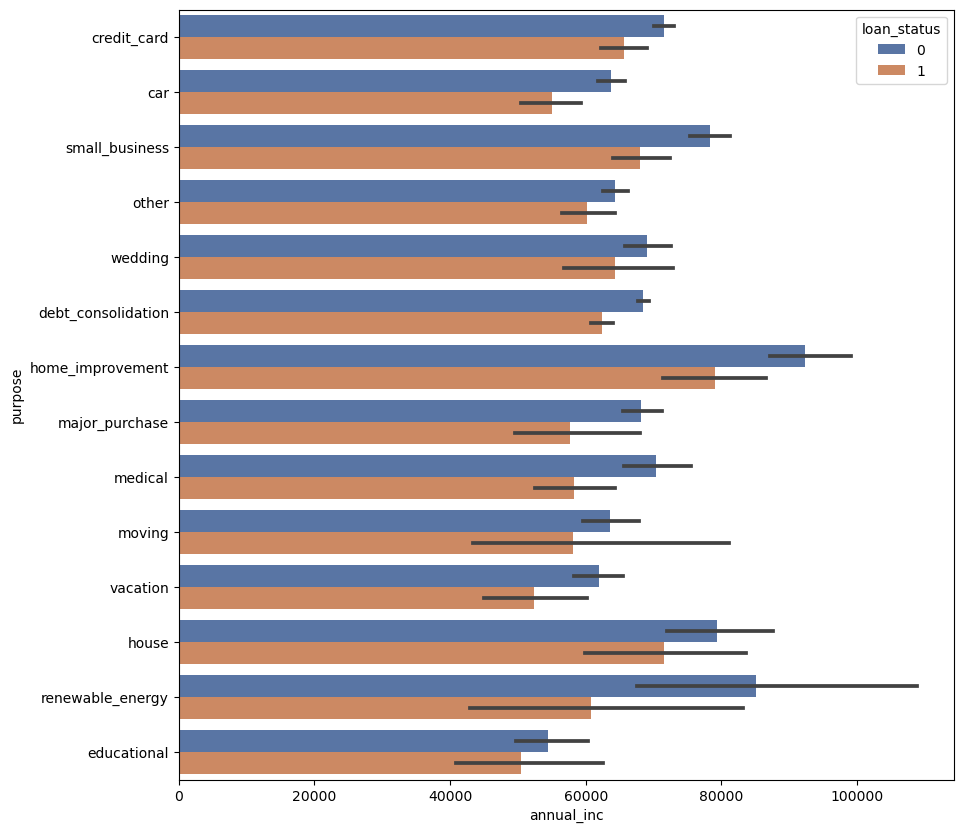

In [259]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

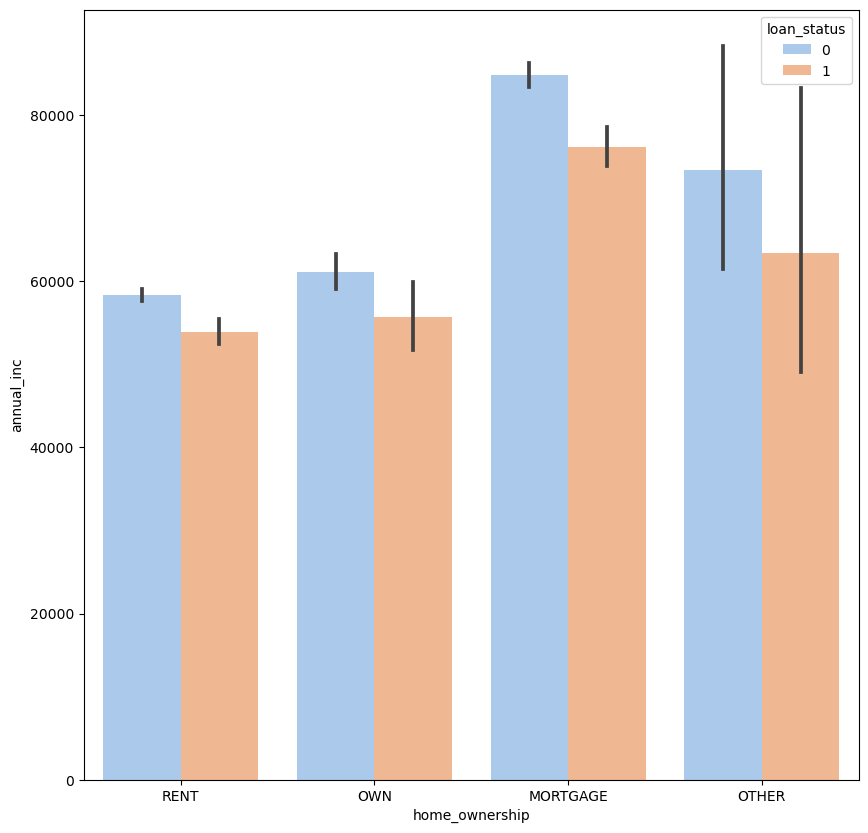

In [260]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

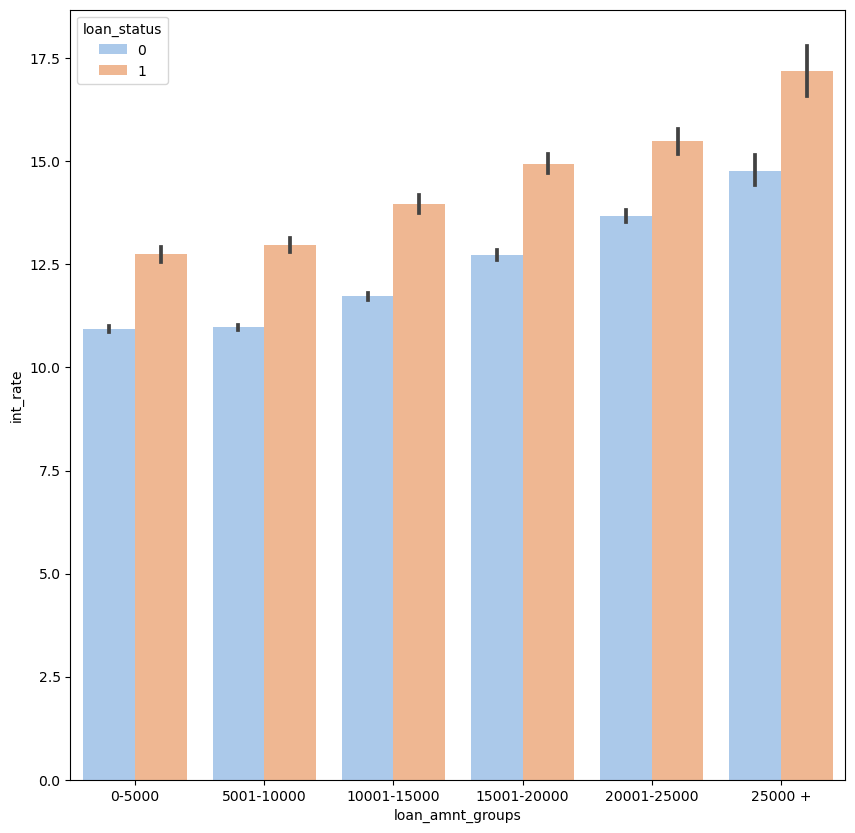

In [261]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate',hue ='loan_status',palette="pastel")
plt.show()

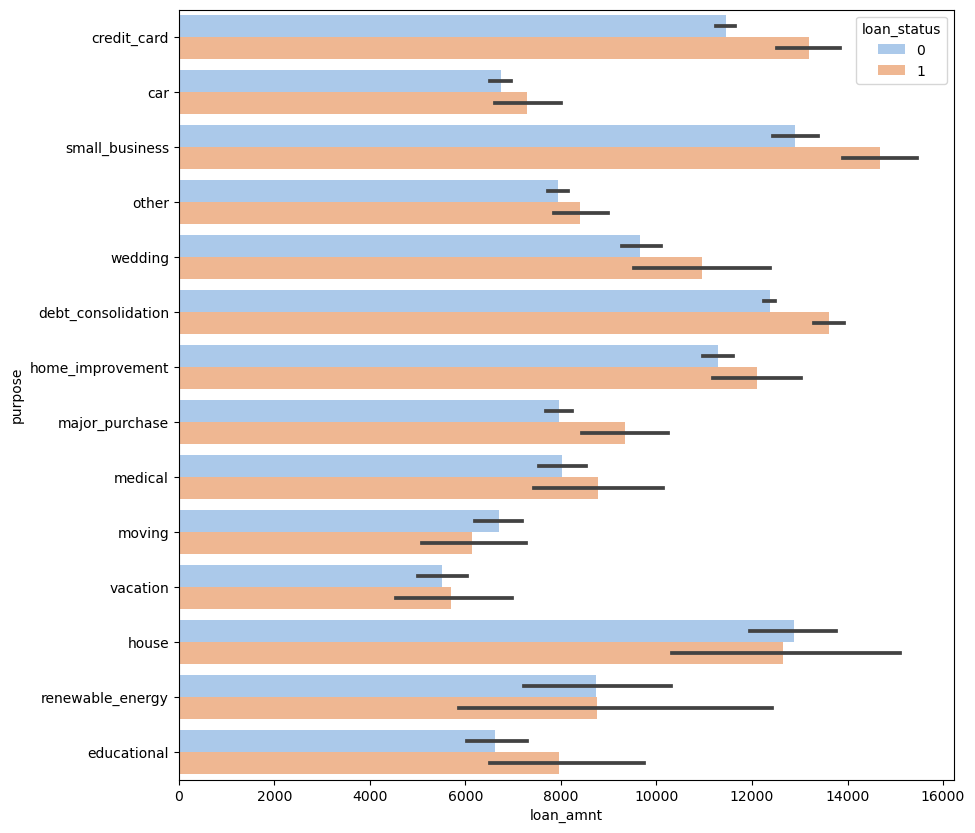

In [262]:

plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose',hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

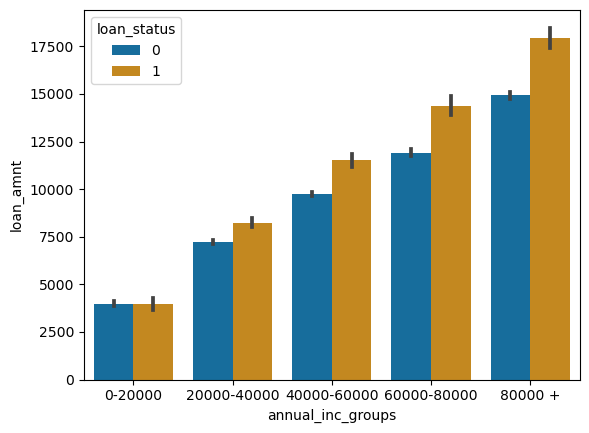

In [263]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

## Bivariate Analysis on annual income against Chargedoff_Proportion -

As we have computed earlier :
Fully Paid = 0
Charged Off = 1

In [264]:
inc_range_vs_loan = loan_data.groupby(['annual_inc_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan[0] + inc_range_vs_loan[1] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan[1] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_groups,0,1,Total,Chargedoff_Proportion
0,0-20000,818,191,1009,0.189296
1,20000-40000,6709,1421,8130,0.174785
2,40000-60000,9326,1675,11001,0.152259
3,60000-80000,6503,1002,7505,0.133511
4,80000 +,8776,1109,9885,0.112190


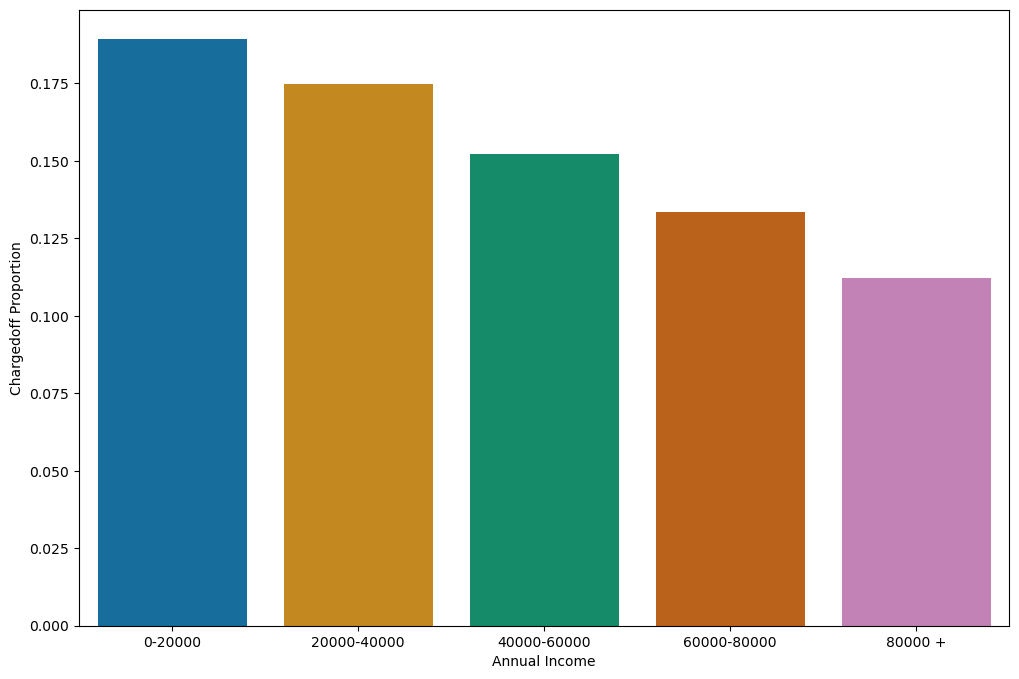

In [265]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1=sns.barplot(x='annual_inc_groups', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Annual Income')
plt.show()


### Observations:
- Income range 80000+  has less chances of charged off.
- Income range 0-20000 has high chances of charged off.
- Notice that with increase in annual income charged off proportion got decreased. 

## Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

In [266]:
purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan[0] + purpose_vs_loan[1]
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan[1] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,0,1,Total,Chargedoff_Proportion
11,small_business,1248,462,1710,0.270175
10,renewable_energy,76,18,94,0.191489
5,house,295,59,354,0.166667
3,educational,265,52,317,0.164038
9,other,3117,596,3713,0.160517
7,medical,555,101,656,0.153963
8,moving,468,84,552,0.152174
2,debt_consolidation,14996,2679,17675,0.151570
12,vacation,298,50,348,0.143678
4,home_improvement,2455,330,2785,0.118492


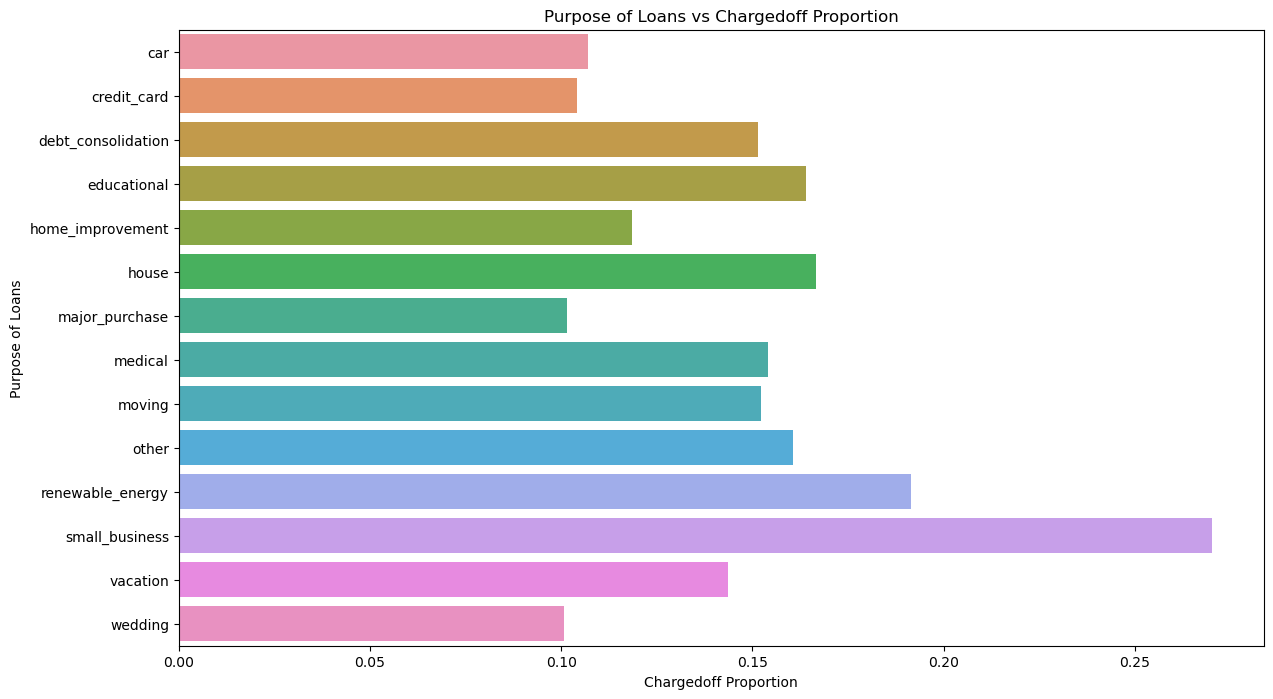

In [267]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans')
ax1.set_xlabel('Chargedoff Proportion')
plt.show()



### Observations:
- small Business applicants have high chances of getting charged off.
- similarly renewable_energy have also high chances of getting charged off.

## Bivariate Analysis on House Ownership of Loan Applicant against Chargedoff_Proportion.

In [268]:
ownership_vs_loan = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ownership_vs_loan['Total'] = ownership_vs_loan[0] + ownership_vs_loan[1]
ownership_vs_loan['Chargedoff_Proportion'] = ownership_vs_loan[1] / ownership_vs_loan['Total']
ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,home_ownership,0,1,Total,Chargedoff_Proportion
1,OTHER,83,18,101,0.178218
3,RENT,15342,2736,18078,0.151344
2,OWN,2370,400,2770,0.144404
0,MORTGAGE,14350,2245,16595,0.135282


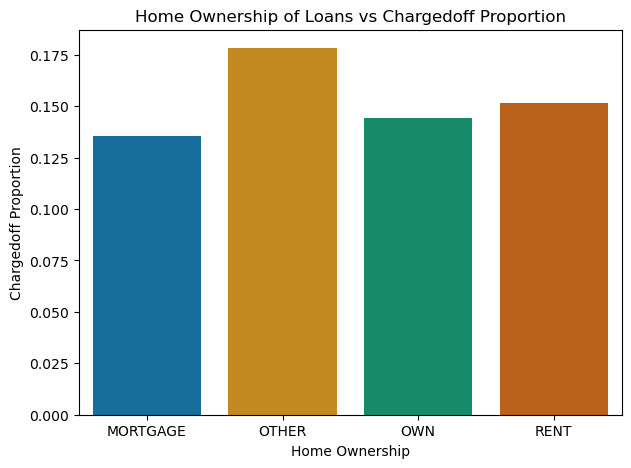

In [269]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better..
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.set_title('Home Ownership of Loans vs Chargedoff Proportion')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=ownership_vs_loan)
ax1.set_xlabel('Home Ownership')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()


### Observations:
- House Ownership in Others and then RENT have high chnaces of getting charged off.

## Bivariate Analysis on grade against Chargedoff_Proportion


In [270]:
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan[0] + grade_vs_loan[1]
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan[1] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,0,1,Total,Chargedoff_Proportion
6,G,198,100,298,0.335570
5,F,646,313,959,0.326382
4,E,1920,700,2620,0.267176
3,D,3894,1085,4979,0.217915
2,C,6381,1288,7669,0.167949
1,B,10004,1355,11359,0.119289
0,A,9102,558,9660,0.057764


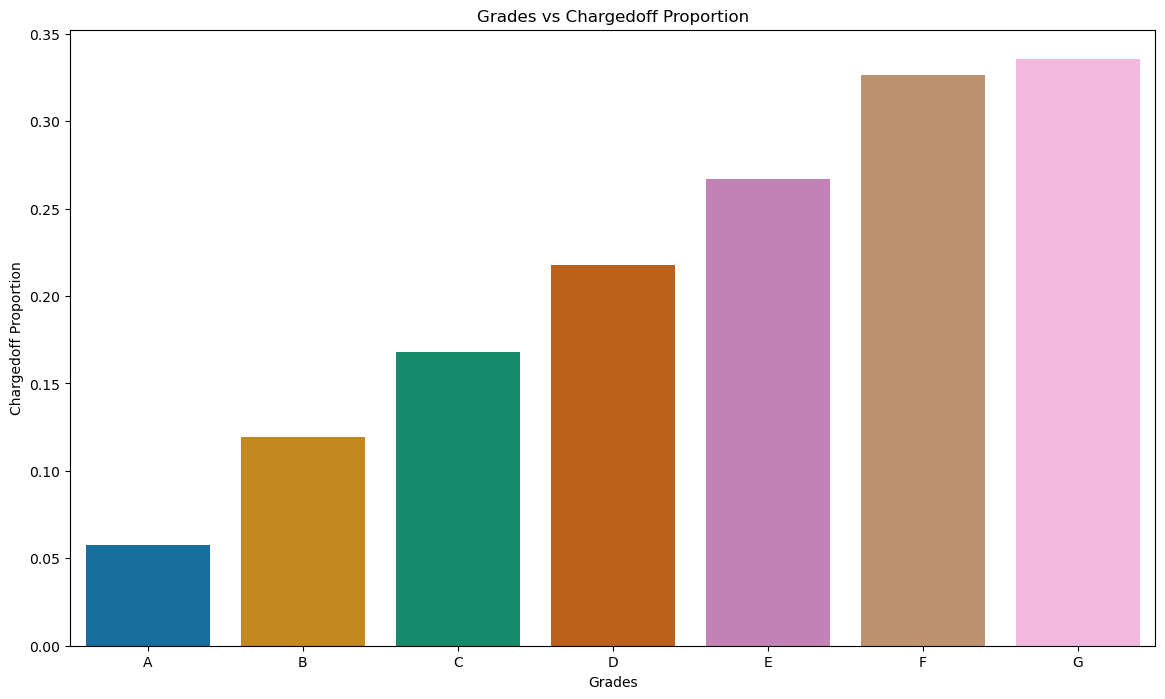

In [271]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff Proportion')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()



#### Observations:
- Grade "A" has very less chances of charged off.
- Grade "F" and "G" have very high chances of charged off.
- Chances of charged of is increasing with grade moving from "A" towards "G"

## Bivariate Analysis on interest rate against Chargedoff_Proportion

In [272]:
interest_vs_loan = loan_data.groupby(['int_rate_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan[1] + interest_vs_loan[0]
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan[1] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_groups,0,1,Total,Chargedoff_Proportion
3,16 +,3305,1230,4535,0.271224
2,12.5-16,9318,1931,11249,0.171660
1,10-12,7982,1184,9166,0.129173
0,0-10,11071,763,11834,0.064475


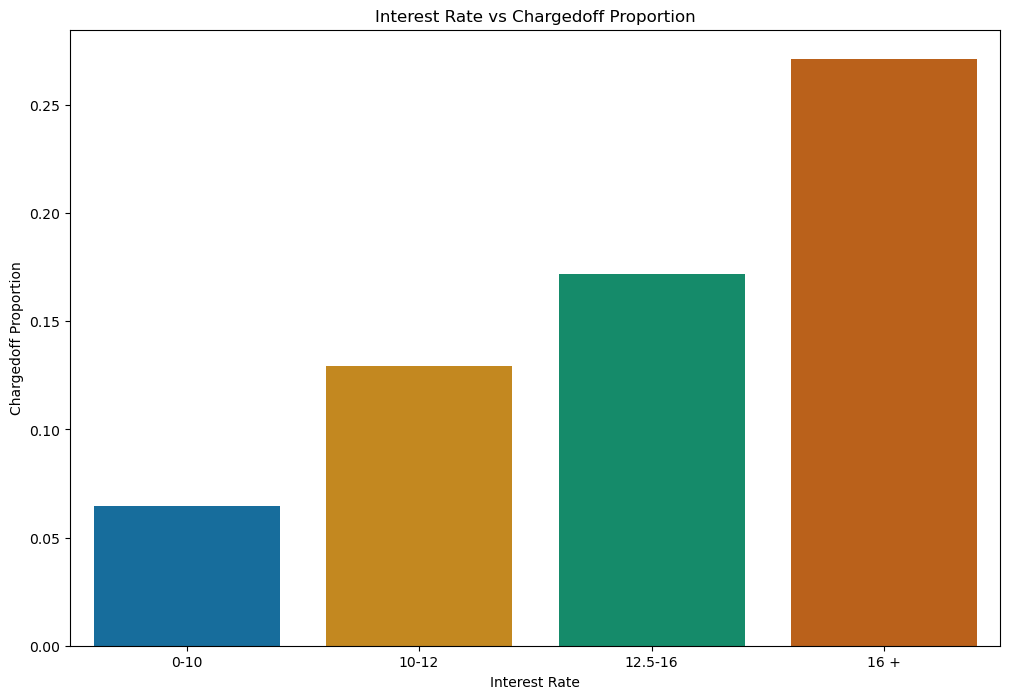

In [273]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion')
ax1=sns.barplot(x='int_rate_groups', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()


#### Observations:
- interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
- interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
- Charged off proportion is increasing with higher intrest rates.

## Bivariate Analysis on employment length against Chargedoff_Proportion

In [274]:
emplen_vs_loan = loan_data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan[1] + emplen_vs_loan[0]
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan[1] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,emp_length,0,1,Total,Chargedoff_Proportion
9,10,7157,1331,8488,0.156810
6,7,1448,263,1711,0.153711
4,5,2736,458,3194,0.143394
0,1,6582,1095,7677,0.142634
5,6,1861,307,2168,0.141605
7,8,1232,203,1435,0.141463
2,3,3457,555,4012,0.138335
3,4,2880,462,3342,0.138241
1,2,3724,567,4291,0.132137
8,9,1068,158,1226,0.128874


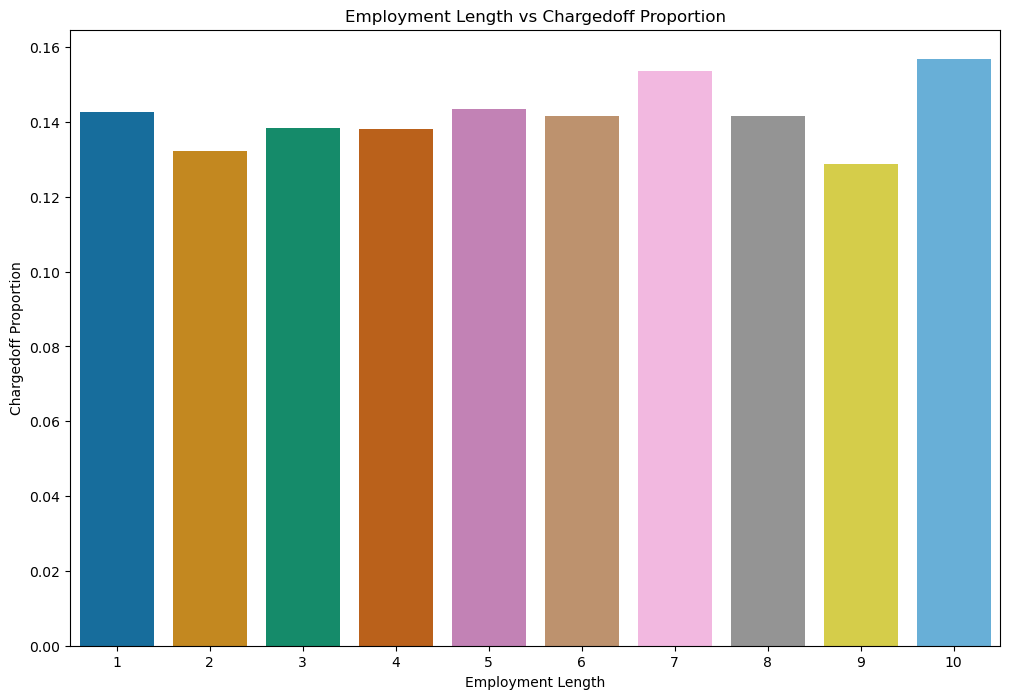

In [275]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observations:
- Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
- It makes sense as with less or no experience they don't have source of income to repay loan.
- Rest of the applicants have more or less same chnaces of getting charged off.

## Bivariate Analysis on verification_status against Chargedoff_Proportion

In [276]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan_data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan[0] + verfy_vs_loan[1]
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan[1] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,0,1,Total,Chargedoff_Proportion
2,Verified,9818,1954,11772,0.165987
1,Source Verified,8098,1396,9494,0.147040
0,Not Verified,14229,2049,16278,0.125875


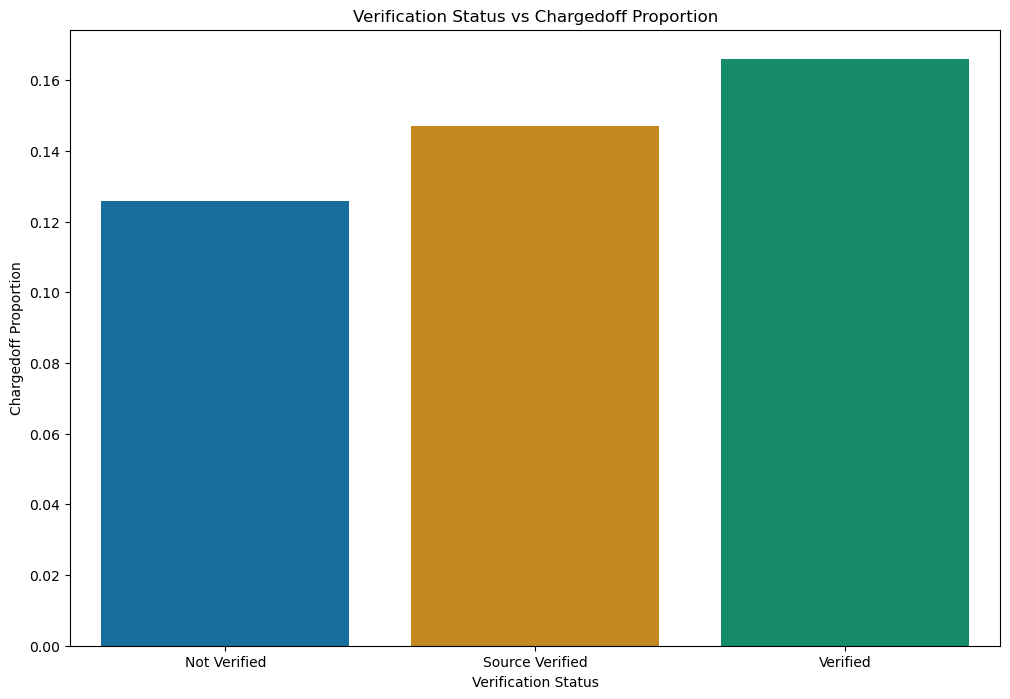

In [277]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

#### Observations:
- There is not much difference in charged off proportion.
- This variable doesn't provide any insights for charged off.

## Bivariate Analysis - Puprose of loan vs Loan amount

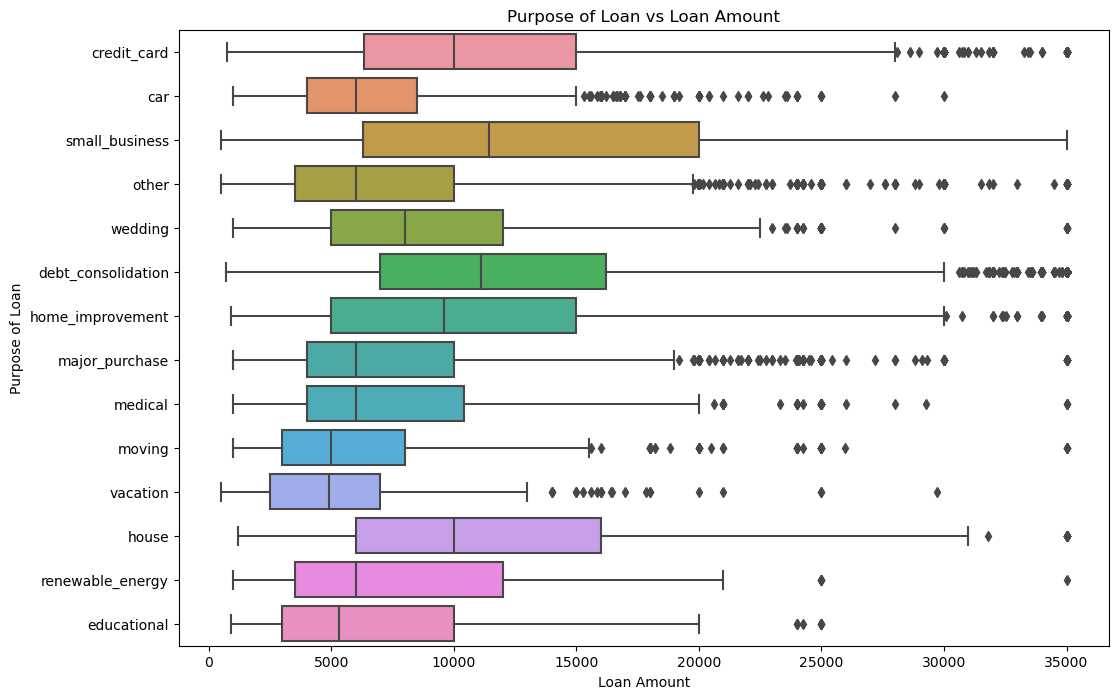

In [278]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan_data)
ax.set_title('Purpose of Loan vs Loan Amount')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Loan Amount')
plt.show()

#### Observations:
- Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
- Debt consolidation is second and Credit card comes 3rd.

## Bivariate Analysis - Term of loan vs Interest Rate

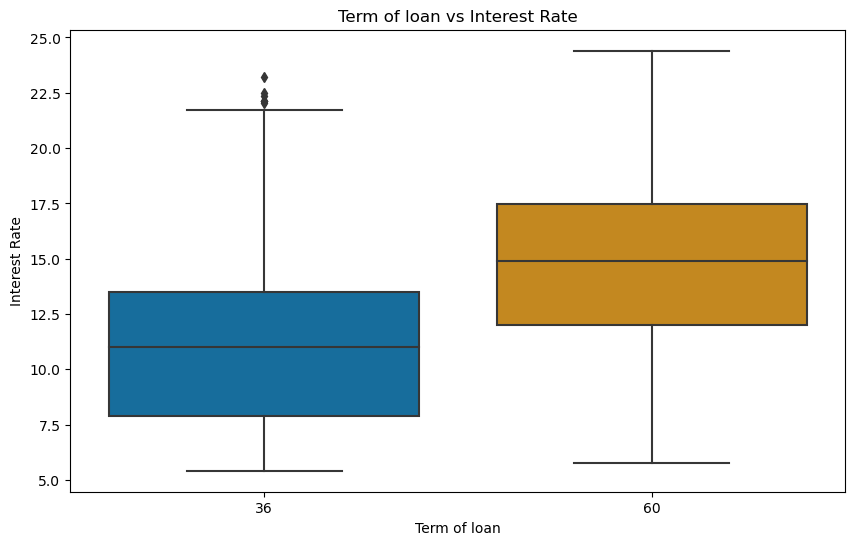

In [279]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =loan_data)
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()

#### Observations:
- It is clear that avearge intrest rate is higher for 60 months loan term.
- Most of the loans issued for longer term had higher intrest rates for repayement.

## Bivariate Analysis - Purpose vs Interest Rate

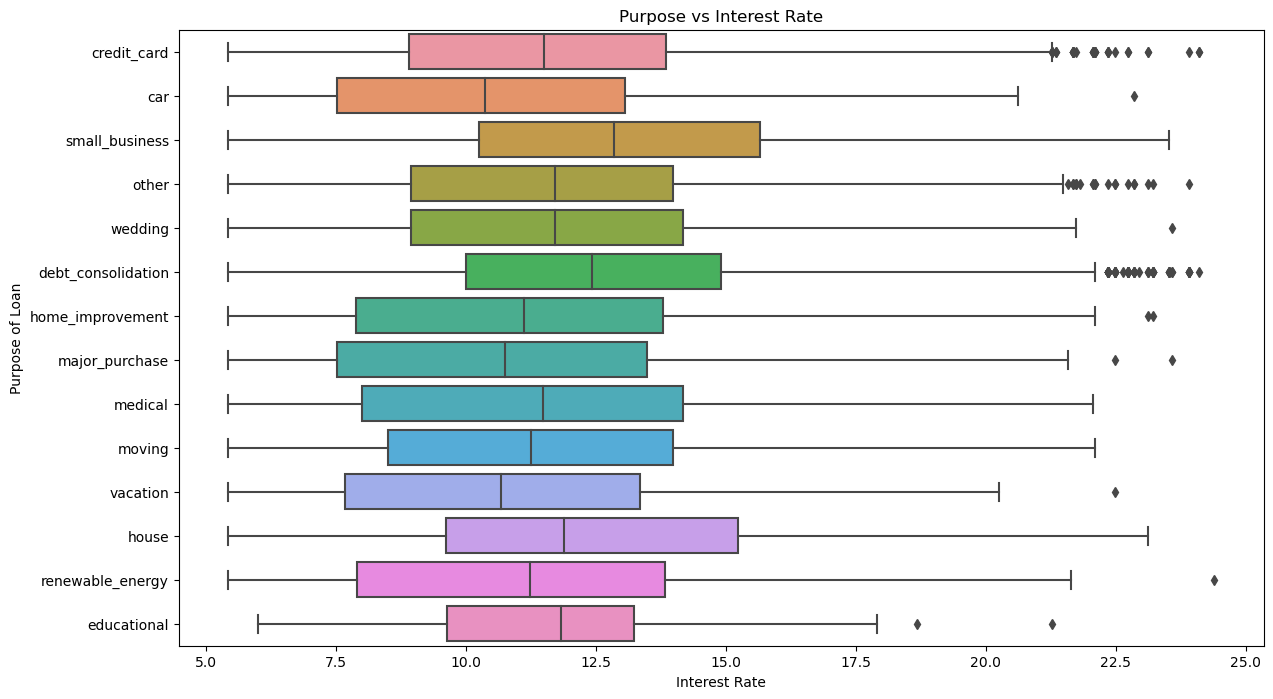

In [280]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_data)
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

#### Observations:
- It is clear that avearge intrest rate is highest for small business purpose.
- Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
- Debt consolidation is 2nd where borrowers had to pay more interest rate.

## Bivariate Analysis - Loan Amount vs Interest Rate

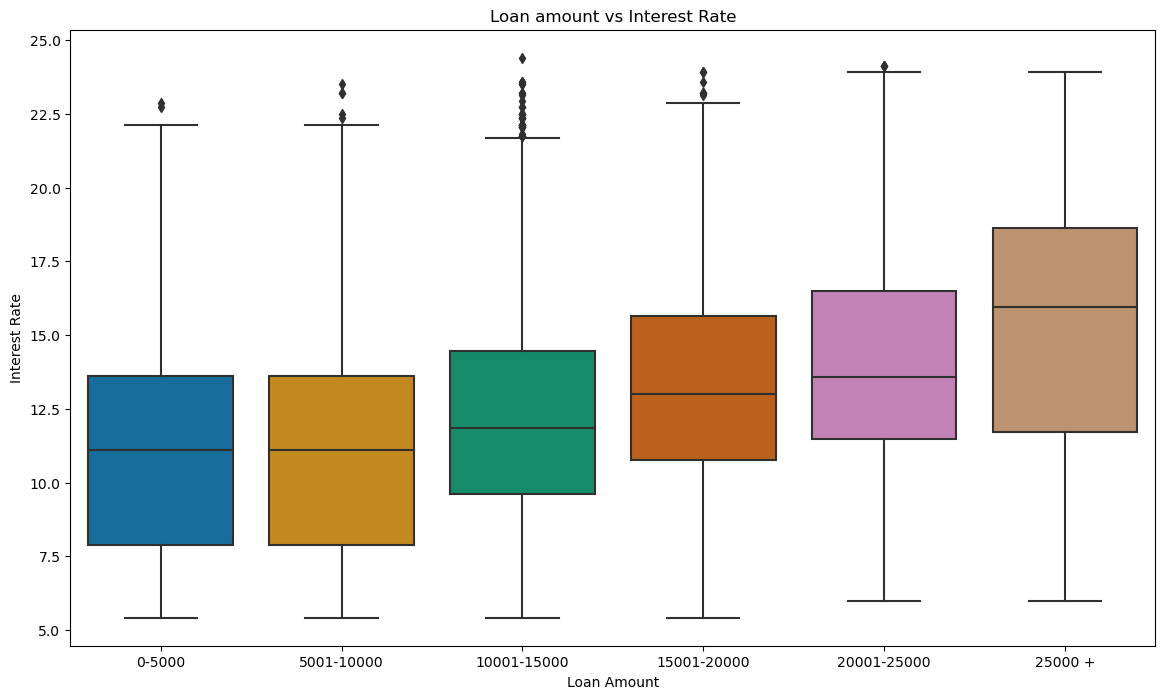

In [281]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_groups', data =loan_data)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

#### Observations:
- It is clear that intrest rate is increasing with loan amount increase.
- probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

## Bivariate Analysis - year vs Interest Rate

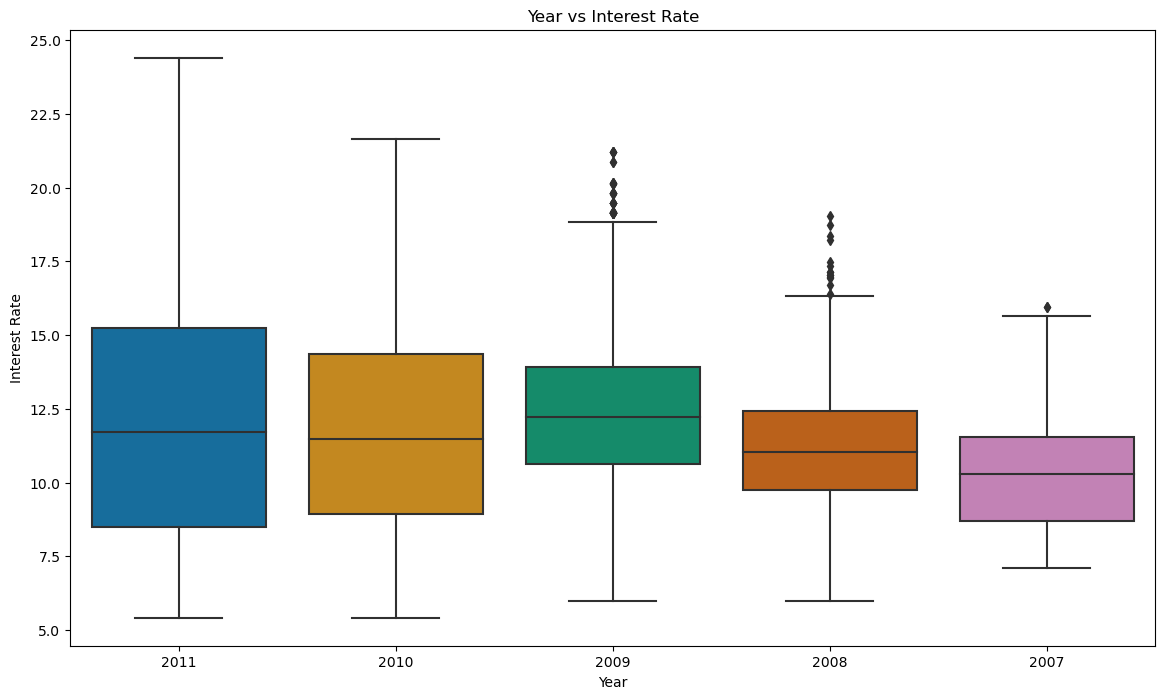

In [282]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='issue_year', data =loan_data)
ax.set_title('Year vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year')
plt.show()


#### Observations:
- Plot shows intrest rate is increasing slowly with increase in year.

## Multivariate Analysis - Pair Plots

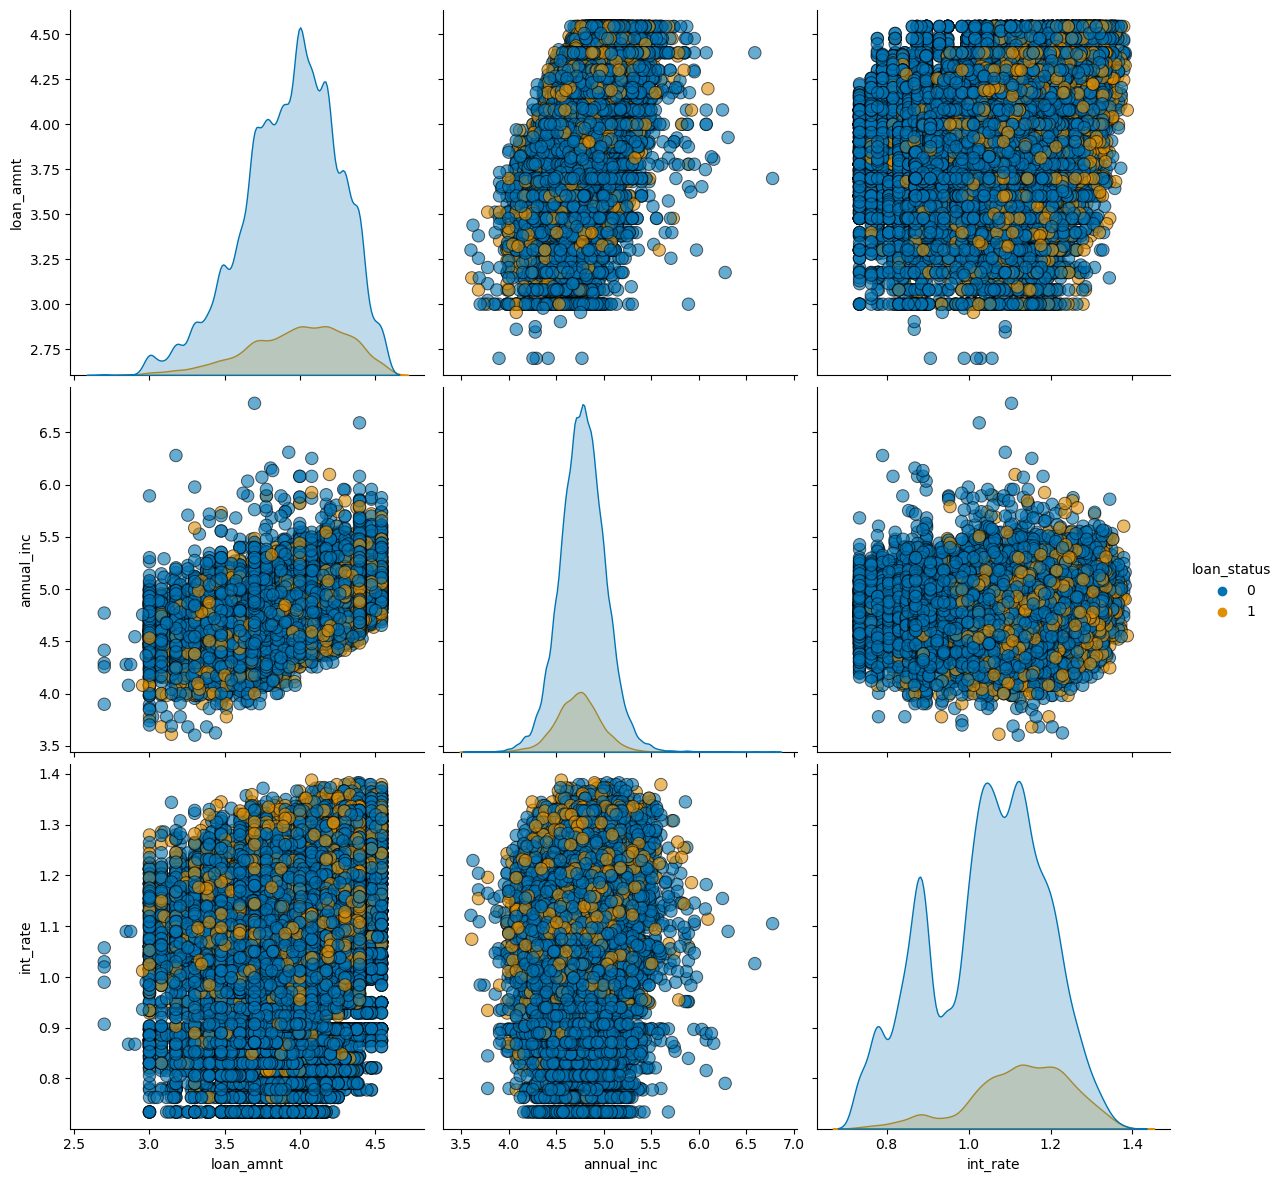

In [283]:

loan_pair = loan_data[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])


# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()


#### Observation:
- Higher the intrest rate higher charged off ratio
- Higher the annual income higher the loan amount slightly.
- increase in number of charged off with increase in year.
- intrest rate is increasing with loan amount increase
- Intrest rate is increasing with loan amount increase this results in high charged off.